# Lead Scoring Case Study

## Step 1: Importing Libraries and Data</span></strong>

In [144]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [145]:
# Environment settings

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

# pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [146]:
# Reading the dataset
df_leads = pd.read_csv("Leads.csv")

In [147]:
df_leads.head()

Prospect ID  Lead Number              Lead Origin     Lead Source  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission          Google   

  Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0           No          No          0          0.0                            0   
1           No          No          0          5.0                          674   
2           No          No          1          2.0                         1532   
3           No          No          0          1.0                          305   
4           No          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity Country           Specialization  \
0                   0.0  Page Visited on Website     NaN                   Select   
1                   2.5             Email Opened   India                   Select   
2                   2.0             Email Opened   India  Business Administration   
3                   1.0              Unreachable   India    Media and Advertising   
4                   1.0        Converted to Lead   India                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course Search Magazine Newspaper Article  \
0                       Better Career Prospects     No       No                No   
1                       Better Career Prospects     No       No                No   
2                       Better Career Prospects     No       No                No   
3                       Better Career Prospects     No       No                No   
4                       Better Career Prospects     No       No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

  Receive More Updates About Our Courses                                 Tags      Lead Quality  \
0                                     No          Interested in other courses  Low in Relevance   
1                                     No                              Ringing               NaN   
2                                     No  Will revert after reading the email          Might be   
3                                     No                              Ringing          Not Sure   
4                                     No  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile    City  \
0                                No                        No          Select  Select   
1                                No                        No          Select  Select   
2                                No                        No  Potential Lead  Mumbai   
3                                No                        

In [148]:
df_leads.shape

(9240, 37)

## Step 2: Data Understanding and Inspection</span></strong>

In [149]:
# Check summary of all numerical columns

df_leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count    9240.000000  9240.000000  9103.000000                  9240.000000           9103.000000   
mean   617188.435606     0.385390     3.445238                   487.698268              2.362820   
std     23405.995698     0.486714     4.854853                   548.021466              2.161418   
min    579533.000000     0.000000     0.000000                     0.000000              0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000              1.000000   
50%    615479.000000     0.000000     3.000000                   248.000000              2.000000   
75%    637387.250000     1.000000     5.000000                   936.000000              3.000000   
max    660737.000000     1.000000   251.000000                  2272.000000             55.000000   

       Asymmetrique Activity Score  Asymmetrique Profile Score  
count                  5022.000000                 5022.000000  
mean                     14.306252                   16.344883  
std                       1.386694                    1.811395  
min                       7.000000                   11.000000  
25%                      14.000000                   15.000000  
50%                      14.000000                   16.000000  
75%                      15.000000                   18.000000  
max                      18.000000                   20.000000

In [150]:
# checking number of unique values in each column
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations                             2
Receive More Updates About Our Courses              1
Tags                                               26
Lead Quality                                        5
Update me on Supply Chain Content                   1
Get updates on DM Content                           1
Lead Profile                                        6
City                                                7
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Asymmetrique Activity Score                        12
Asymmetrique Profile Score                         10
I agree to pay the amount through cheque            1
A free copy of Mastering The Interview              2
Last Notable Activity                              16
dtype: int64

In [151]:
# Check data types of columns and nulls
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Inference: There are **null values** in the dataframe

In [152]:
#Checking for count of missing values in each column
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Receive More Updates About Our Courses              0
Tags                                             3353
Lead Quality                                     4767
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
Lead Profile                                     2709
City                                             1420
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

Inference: There are few columns with quite a high number of missing/null values in the dataframe. We will have to decide how to address them in data cleaning / data imputation step

In [153]:
# Check for duplicate rows
print(df_leads.duplicated().sum())

0


Inference: There are no duplicates in the dataframe df_leads.

## Step 3: Data Cleaning

As stated in the Problem Statement, many categorical variables have a level called Select, which must be handled because it is equivalent to a null value. One possible explanation is that the consumer did not choose any options from the list, hence the values in those columns remained the default 'choose' for Select.

In [154]:
# List of columns having 'Select' as value

cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [155]:
# Converting 'Select' values to NaN.
df_leads = df_leads.replace('Select', np.nan)

In [156]:
# Checking if all 'Select' values have been handled in the columns
cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


There are no Select Values in df_leads

**Handling Missing Values**

In [157]:
# Calculating Missing Values Percentage

100*(df_leads.isna().mean()).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
A free copy of Mastering The Interview            0.000000
Prospect ID                                       0.000000
Newspaper Article                                 0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Lead Number                                       0.000000
Magazine                                          0.000000
Search                                            0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.000000
Do Not Call                                       0.000000
Do Not Email                                      0.000000
Lead Origin                                       0.000000
Last Notable Activity                             0.000000
dtype: float64

In [158]:
# user defined function to drop columns and know the shape before and after dropping

def dropNullColumns(data ,percentage=40):

    missing_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    print("Shape before dropping columns: ",data.shape)

    data.drop(labels=col_to_drop,axis=1, inplace=True)

    print("Shape after dropping columns: ",data.shape)

In [159]:
# dropping columns using UDF
dropNullColumns(df_leads)

Total columns dropped:  7 

List of columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 30)


In [160]:
# Checking the percentage of null values for remaining columns

100*(df_leads.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Digital Advertisement                             0.000000
Search                                            0.000000
X Education Forums                                0.000000
Newspaper Article                                 0.000000
Magazine                                          0.000000
Lead Number                                       0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.000000
Do Not Call                                       0.000000
Do Not Email                                      0.000000
Lead Origin                                       0.000000
Last Notable Activity                             0.000000
dtype: float64

**Columns with Categorical Data**

In [161]:
# Select the columns with non-numeric data type
categorical_cols = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the selected columns
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


Inference: Approach would be to check the count of values in each categorical column and then decide how to treat the missing values for that particular column

In [162]:
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")


value_counts % for : City 

City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: proportion, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.

#### Insights:
City has 39.71 % missing values. Imputing missing values with Mumbai will make the data more skewed. Skewness will later cause bias in the model. Hence City column can be dropped.

Specialization has 36.58 % missing values. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. We need to create additional category called Others.

Tags has 36.29 % missing values. Tags are assigned to customers indicating the current status of the lead. Since this is current status, this column will not be useful for modeling. Hence it can be dropped.

What matters most to you in choosing a course: This variable has 29.32 % missing values. 99.95% customers have selected better career prospects. This is massively skewed and will not provide any insight.

What is your current occupation:  We can impute the missing values with Unemployed as it has the most values. This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed.

X Education sells online courses and appx 96% of the customers are from India. Does not make business sense right now to impute missing values with India. Hence `Country column can be dropped.

Email Opened is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label Email Opened.

Google is having highest number of occurences and overall nulls in this column is just 0.39%, hence we will impute the missing values with label Google


Dropping the following columns
- 'City',
- 'Tags',
- 'Country',
- 'What matters most to you in choosing a course'

In [163]:
# Dropping Columns
print("Before Drop",df_leads.shape)
df_leads.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Drop",df_leads.shape)

Before Drop (9240, 30)
After Drop (9240, 26)


**Imputing the following columns**
- 'Specialization',
- 'Lead Source',
- 'Last Activity',
- 'What is your current occupation'

In [164]:
# Imputing values as per the above observations/insights

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df_leads=df_leads.fillna(value=missing_values)

In [165]:
# Re Checking the percentage of null values for remaining columns

round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted                                   0.00
Do Not Call                                 0.00
Do Not Email                                0.00
Lead Source                                 0.00
Lead Origin                                 0.00
Last Notable Activity                       0.00
dtype: float64

**Columns with Numerical Data**

In [166]:
# TotalVisits
print("TotalVisits - Value Counts")
print("----------------------------------------")
df_leads.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts
----------------------------------------


TotalVisits
0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

**Inference**: Missing values in 'TotalVisits' can be imputed with `mode`.

In [167]:
# TotalVisits missing values to be imputed with mode
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0], inplace=True)

In [168]:
# Page Views Per Visit
print("Page Views Per Visit - Value Counts")
print("----------------------------------------")
df_leads.TotalVisits.value_counts().head(10)

Page Views Per Visit - Value Counts
----------------------------------------


TotalVisits
0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

**Inference**: Missing values in 'Page Views Per Visit' can be imputed with `mode`.

In [169]:
# Page Views Per Visit missing values to be imputed with mode

df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mode()[0], inplace=True)

In [170]:
# Re Checking the percentage of null values after handling categorical and numerical columns

round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                                   0.0
Do Not Call                                 0.0
Do Not Email                                0.0
Lead Source                                 0.0
Lead Origin                                 0.0
Last Notable Activity                       0.0
dtype: float64

**Removing Unwanted Columns**

In [171]:
# Last Notable Activity
print("Last Notable Activity")
print("----------------------------------------")
100*df_leads['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
----------------------------------------


Last Notable Activity
Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: proportion, dtype: float64

**Handling columns with only one unique value**

In [172]:
#check for columns with one unique value, count and freq is same

df_leads.describe(include = 'object')

Prospect ID              Lead Origin Lead Source Do Not Email  \
count                                   9240                     9240        9240         9240   
unique                                  9240                        5          21            2   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission      Google           No   
freq                                       1                     4886        2904         8506   

       Do Not Call Last Activity Specialization What is your current occupation Search Magazine  \
count         9240          9240           9240                            9240   9240     9240   
unique           2            17             19                               6      2        1   
top             No  Email Opened         Others                      Unemployed     No       No   
freq          9238          3540           3380                            8290   9226     9240   

       Newspaper Article X Education Forums Newspaper Digital Advertisement  \
count               9240               9240      9240                  9240   
unique                 2                  2         2                     2   
top                   No                 No        No                    No   
freq                9238               9239      9239                  9236   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9240                                   9240   
unique                       2                                      1   
top                         No                                     No   
freq                      9233                                   9240   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9240                      9240   
unique                                 1                         1   
top                                   No                        No   
freq                                9240                      9240   

       I agree to pay the amount through cheque A free copy of Mastering The Interview  \
count                                      9240                                   9240   
unique                                        1                                      2   
top                                          No                                     No   
freq                                       9240                                   6352   

       Last Notable Activity  
count                   9240  
unique                    16  
top                 Modified  
freq                    3407

**Inference**: Following columns have only one unique value:
- 'I agree to pay the amount through cheque',
- 'Get updates on DM Content',
- 'Update me on Supply Chain Content',
- 'Receive More Updates About Our Courses',
- 'Magazine'

These columns are of no use as they have <u>_only one category of response_</u> from customer and can be dropped


In [173]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

print("Before Dropping Columns",df_leads.shape)
df_leads.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",df_leads.shape)


Before Dropping Columns (9240, 26)
After Dropping Columns (9240, 21)


**Dropping columns of no use for modeling:**     
Columns such as:

- 'Prospect ID',
- 'Lead Number',
- 'Last Notable Activity'

Above columns do not add any value to the model. Dropping these columns will remove unnecessary data from the dataframe.

In [174]:
# Dropping Columns
print("Before Dropping Columns",df_leads.shape)
df_leads.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",df_leads.shape)

Before Dropping Columns (9240, 21)
After Dropping Columns (9240, 18)


In [175]:
# get the percentage of missing values in each row,output in descending order so high value will come on top

100*(df_leads.isna().mean(axis=1)).sort_values(ascending=False).head(10)

0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
dtype: float64

**Inference:** No missing values in rows

**Checking skewness in categorical columns**

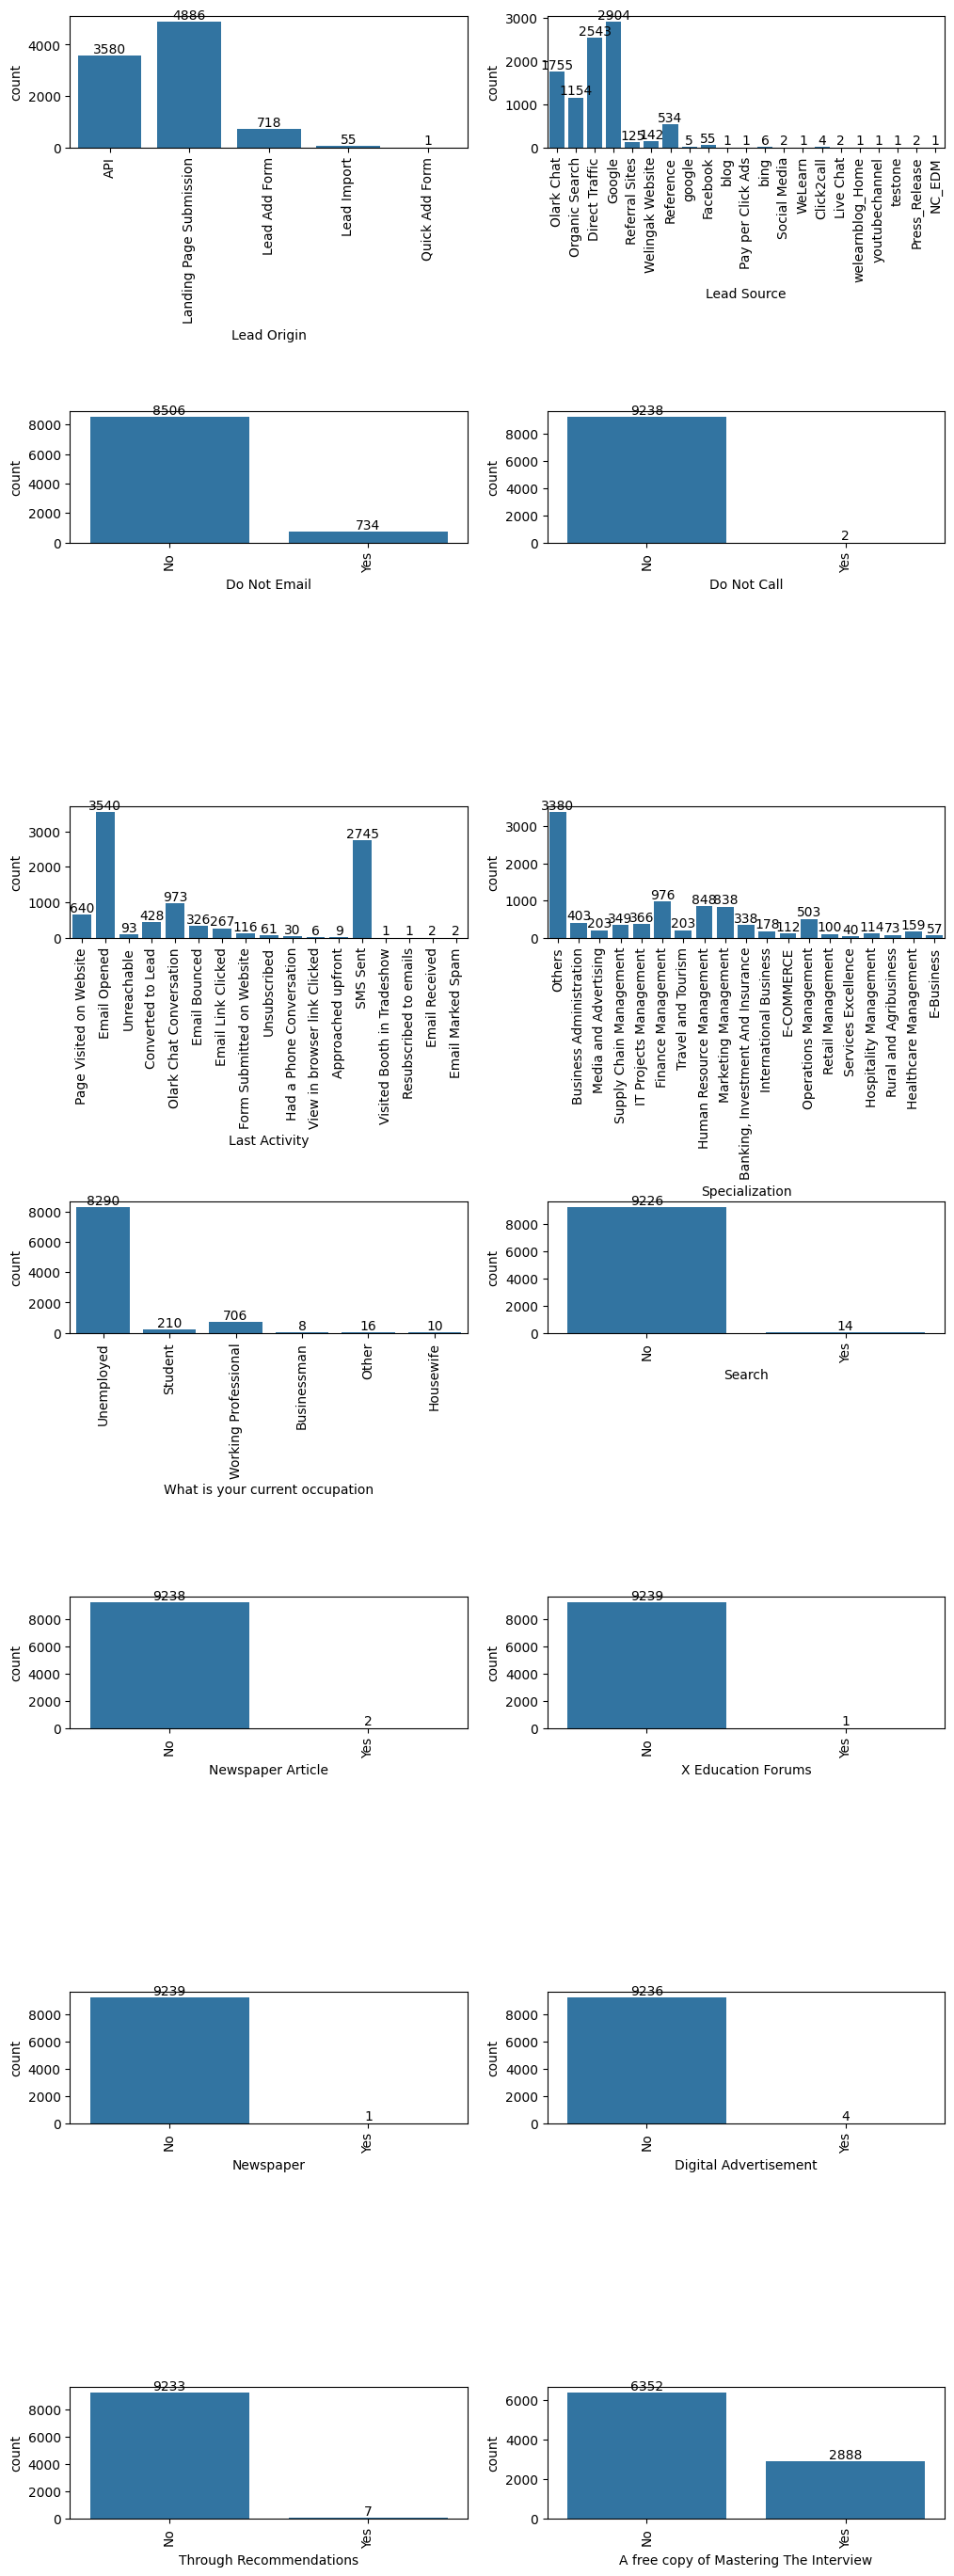

In [176]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=df_leads)
    plt.xticks(rotation=90)

    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

**Following columns have data which is `highly skewed` :**
- 'Do Not Call',
- 'Search',
- 'Newspaper Article',
- 'X Education Forums',
- 'Newspaper',
- 'Digital Advertisement',
- 'Through Recommendations'.

Hence these columns will be `dropped` as they will not add any value to the model. Morever, Skewed variables can affect the performance of logistic regression models, as they can `lead to biased` or `inaccurate parameter estimates`.

In [177]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ",df_leads.shape)
df_leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


In [178]:
df_leads.head()

Lead Origin     Lead Source Do Not Email  Converted  TotalVisits  \
0                      API      Olark Chat           No          0          0.0   
1                      API  Organic Search           No          0          5.0   
2  Landing Page Submission  Direct Traffic           No          1          2.0   
3  Landing Page Submission  Direct Traffic           No          0          1.0   
4  Landing Page Submission          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation A free copy of Mastering The Interview  
0                   Others                      Unemployed                                     No  
1                   Others                      Unemployed                                     No  
2  Business Administration                         Student                                    Yes  
3    Media and Advertising                      Unemployed                                     No  
4                   Others                      Unemployed                                     No

**Outlier Analysis**

In [179]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

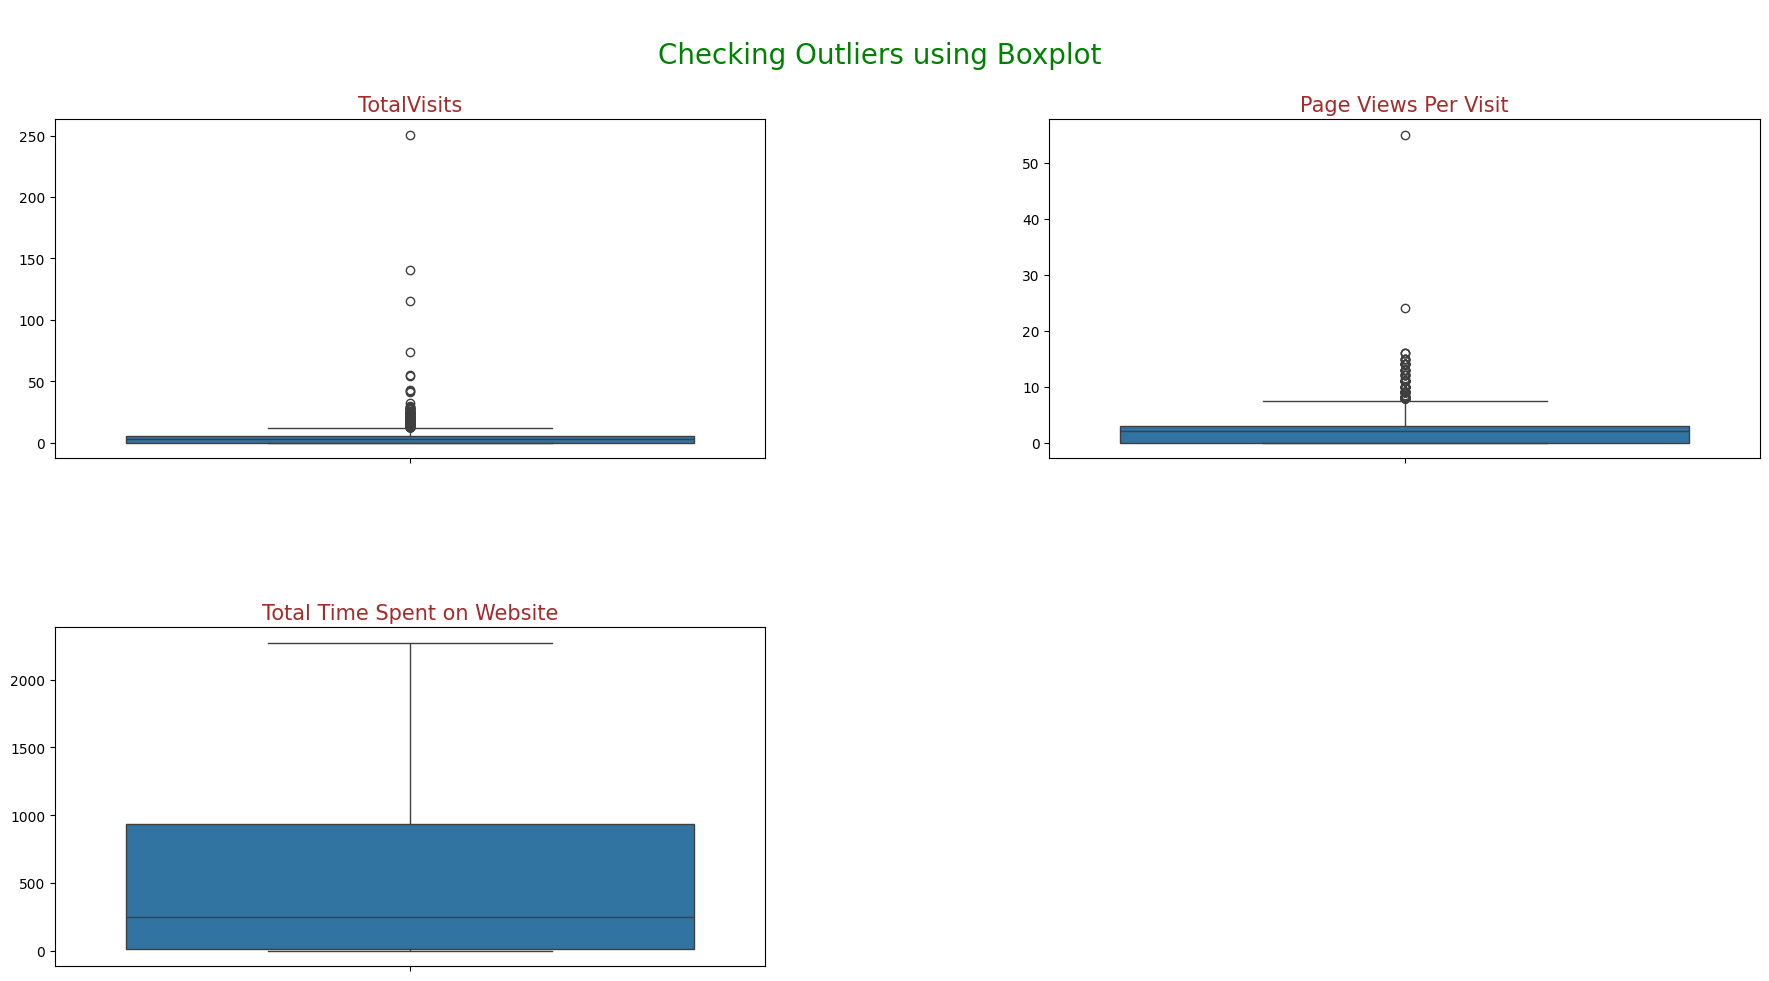

In [180]:
# Checking outliers for numerical variables other than target variable
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF
Check_Outliers(df_leads,num_cols)

`"TotalVisits"`,`"Page Views Per Visit"`:Both these variables contain outliers as can be seen in the boxplot
So, These outliers needs to be treated for these variables

In [181]:
# before outlier treatment
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000  9240.000000                  9240.000000           9240.000000
mean      0.385390     3.394156                   487.698268              2.327787
std       0.486714     4.836682                   548.021466              2.164258
min       0.000000     0.000000                     0.000000              0.000000
10%       0.000000     0.000000                     0.000000              0.000000
25%       0.000000     0.000000                    12.000000              0.000000
50%       0.000000     3.000000                   248.000000              2.000000
75%       1.000000     5.000000                   936.000000              3.000000
95%       1.000000    10.000000                  1562.000000              6.000000
max       1.000000   251.000000                  2272.000000             55.000000

In [182]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])


In [183]:
# Checking outliers for numerical variables other than target variable
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF
Outlier_treatment(df_leads,capping_cols)

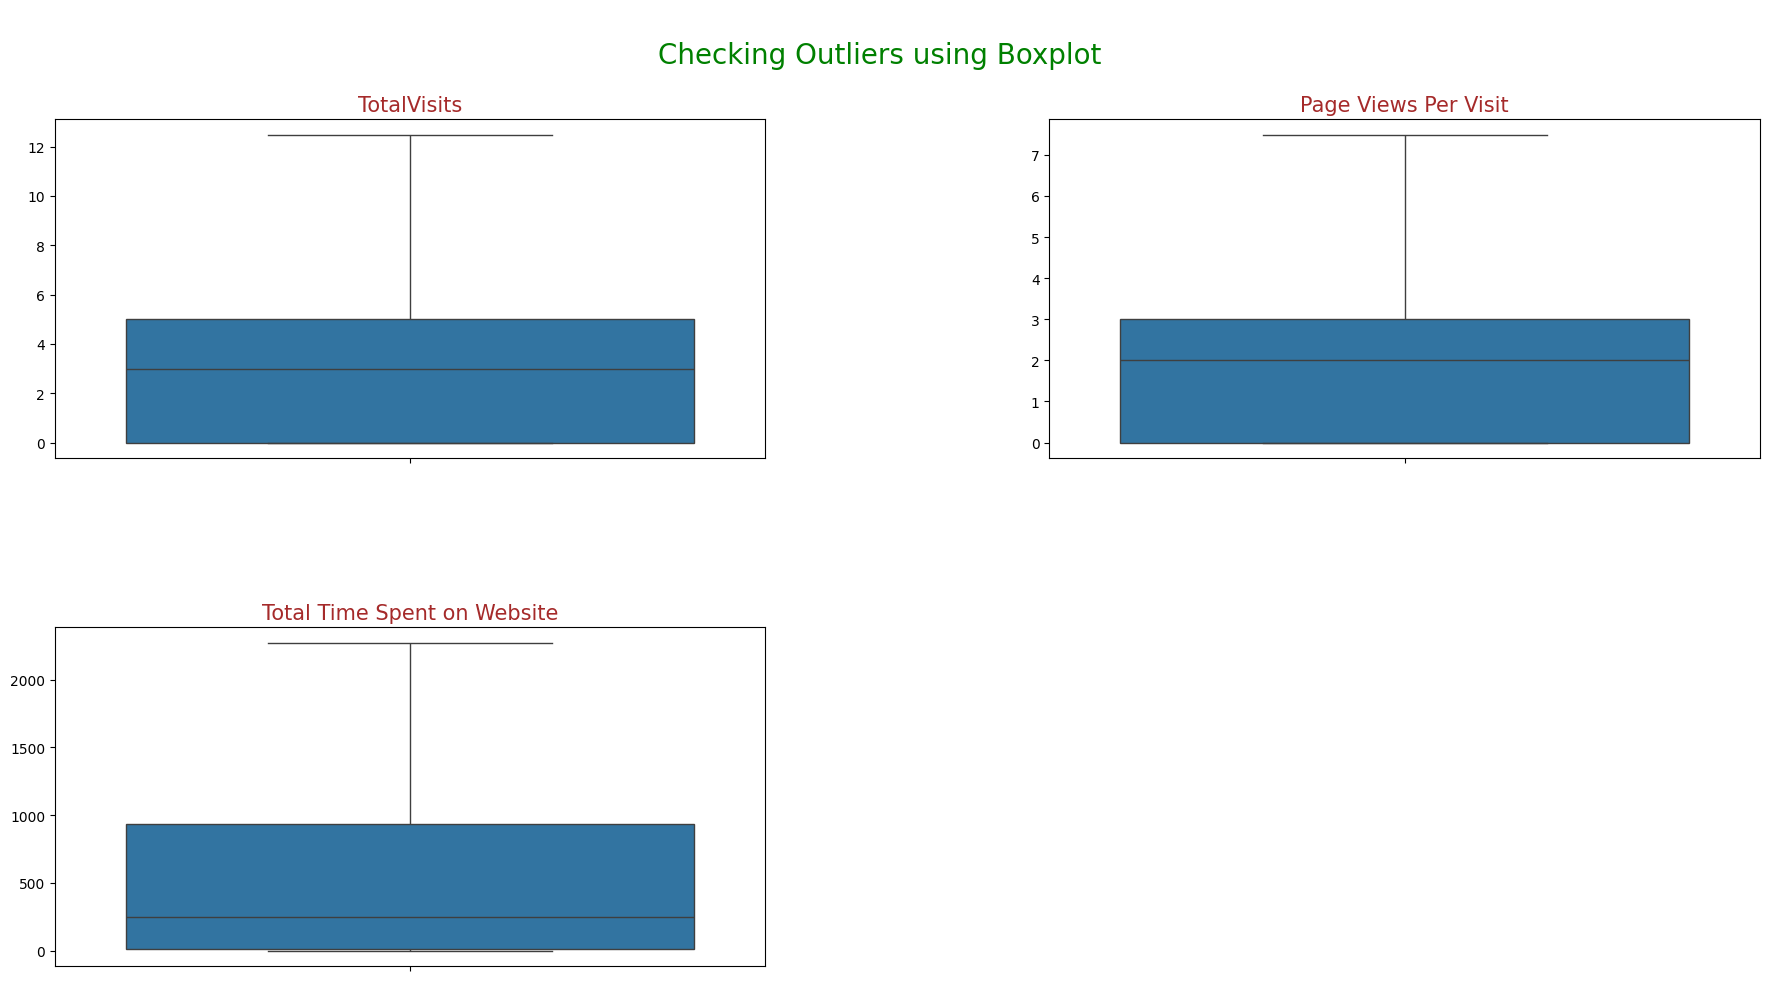

In [184]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(df_leads,num_cols)

In [185]:
# after outlier treatment detailed percentile values
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000  9240.000000                  9240.000000           9240.000000
mean      0.385390     3.213853                   487.698268              2.274987
std       0.486714     3.005136                   548.021466              1.917776
min       0.000000     0.000000                     0.000000              0.000000
10%       0.000000     0.000000                     0.000000              0.000000
25%       0.000000     0.000000                    12.000000              0.000000
50%       0.000000     3.000000                   248.000000              2.000000
75%       1.000000     5.000000                   936.000000              3.000000
95%       1.000000    10.000000                  1562.000000              6.000000
max       1.000000    12.500000                  2272.000000              7.500000

**Fixing Invalid values & Standardising Data in columns**

- Checking if entries in data are in correct format or not , casing styles (UPPER,lower)
- Checking data types of columns

In [186]:
df_leads.head()

Lead Origin     Lead Source Do Not Email  Converted  TotalVisits  \
0                      API      Olark Chat           No          0          0.0   
1                      API  Organic Search           No          0          5.0   
2  Landing Page Submission  Direct Traffic           No          1          2.0   
3  Landing Page Submission  Direct Traffic           No          0          1.0   
4  Landing Page Submission          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation A free copy of Mastering The Interview  
0                   Others                      Unemployed                                     No  
1                   Others                      Unemployed                                     No  
2  Business Administration                         Student                                    Yes  
3    Media and Advertising                      Unemployed                                     No  
4                   Others                      Unemployed                                     No

In [187]:
## Categorical Variables

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("_$_"*40,"\n")


value_counts % for : Lead Origin 

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64 

_$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$_ 

value_counts % for : Lead Source 

Lead Source
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLea

**Inference**
- We've noticed that some categories/levels in the `"Lead Score" and "Last Activity"` columns have very few records. To prevent ending up with a bunch of unnecessary columns when we create dummy variables, we're planning to group these categories together under "Others". That way, we can keep things neat and tidy.

- Also we can see `"Google"` & `"google"` are same in `"Lead Source"`, so we will standardise the case.

In [188]:
# Grouping low frequency value levels to Others
df_leads['Lead Source'] = df_leads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
df_leads['Lead Source'] = df_leads['Lead Source'].replace("google","Google")

In [189]:
# value_counts percentage after replace
df_leads["Lead Source"].value_counts(normalize=True)*100

Lead Source
Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: proportion, dtype: float64

In [190]:
# Grouping low frequency value levels to Others
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation',
                                                               'Approached upfront',
                                                               'View in browser link Clicked',
                                                               'Email Marked Spam',
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [191]:
# value_counts percentage after replace
df_leads['Last Activity'].value_counts(normalize=True)*100

Last Activity
Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: proportion, dtype: float64

In [192]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
df_leads.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
df_leads.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)


Inference: "Do Not Email" & "Free_copy" both are binary categorical columns lets map both of them yes/no to 1/0

In [193]:
# Mapping binary categorical variables (Yes/No to 1/0)
df_leads['Do Not Email'] = df_leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads['Free_copy'] = df_leads['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads.info()

Inference: The data types appear to be suitable and no modifications are necessary.

## <strong><span>Step 4: Data Analysis (EDA)</span></strong>

**Checking if Data is Imbalanced or not**
- Data is imbalance when one value is present in majority and other is in minority meaning an uneven distribution of observations in dataset
- Data imbalance is in the context of Target variable only
- `Target variable` is `'Converted'` which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted

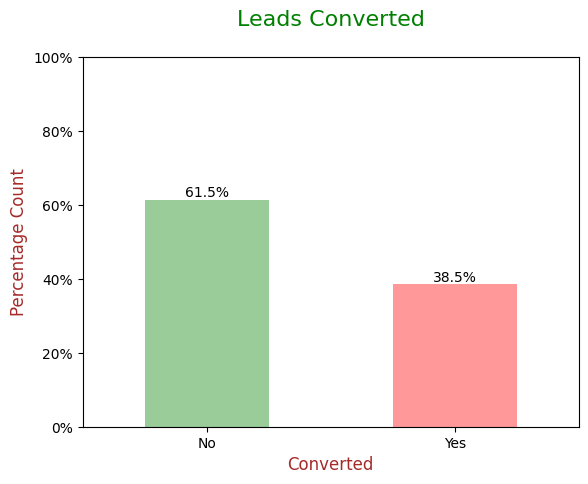

In [194]:
## ploting the results on bar plot

ax=(100*df_leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks]
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()


**Insights:**
- **Conversion rate is of 38.5%**, meaning only 38.5% of the people have converted to leads.(Minority)
- While 61.5% of the people didnt convert to leads. (Majority)

In [195]:
### Ratio of Data Imbalance
ratio=(df_leads["Converted"].value_counts(normalize=True).loc[0])/(df_leads["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


#### Univariate Analysis

In [196]:
df_leads.shape

(9240, 11)

In [197]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  TotalVisits  \
0                      API      Olark Chat             0          0          0.0   
1                      API  Organic Search             0          0          5.0   
2  Landing Page Submission  Direct Traffic             0          1          2.0   
3  Landing Page Submission  Direct Traffic             0          0          1.0   
4  Landing Page Submission          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0                   Others   
4                         1428                   1.0        Converted to Lead   

            Specialization Current_occupation  Free_copy  
0                   Others         Unemployed          0  
1                   Others         Unemployed          0  
2  Business Administration            Student          1  
3    Media and Advertising         Unemployed          0  
4                   Others         Unemployed          0

In [198]:
#List of categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

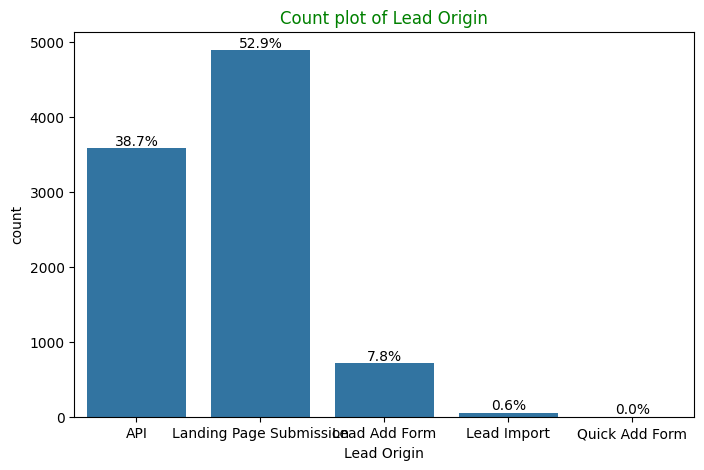

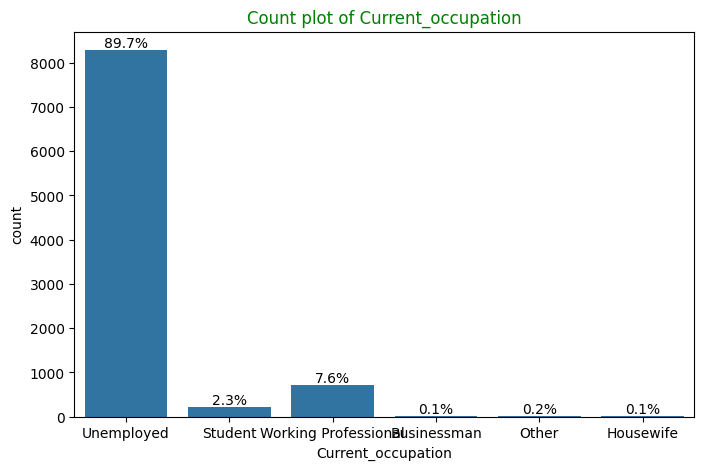

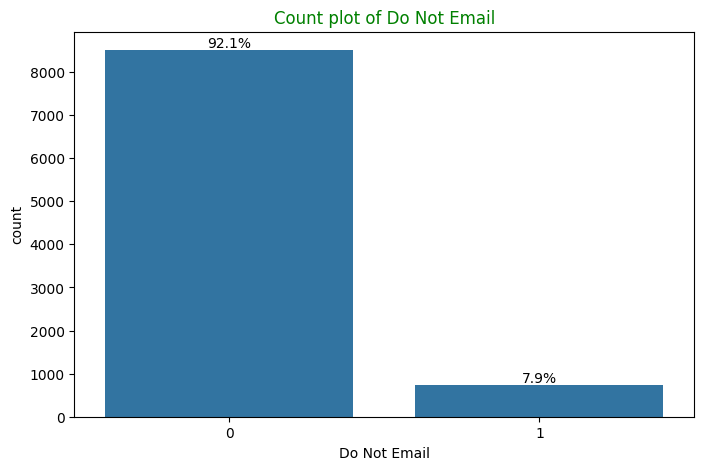

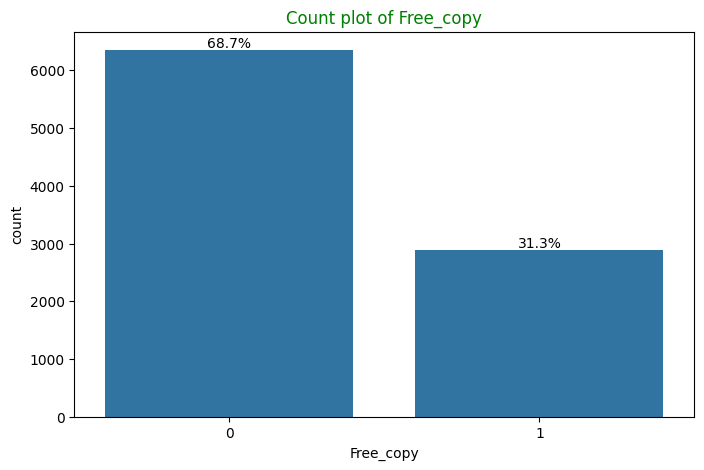

In [199]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols[:4]:

    plt.figure(figsize=[8,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=0)

    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


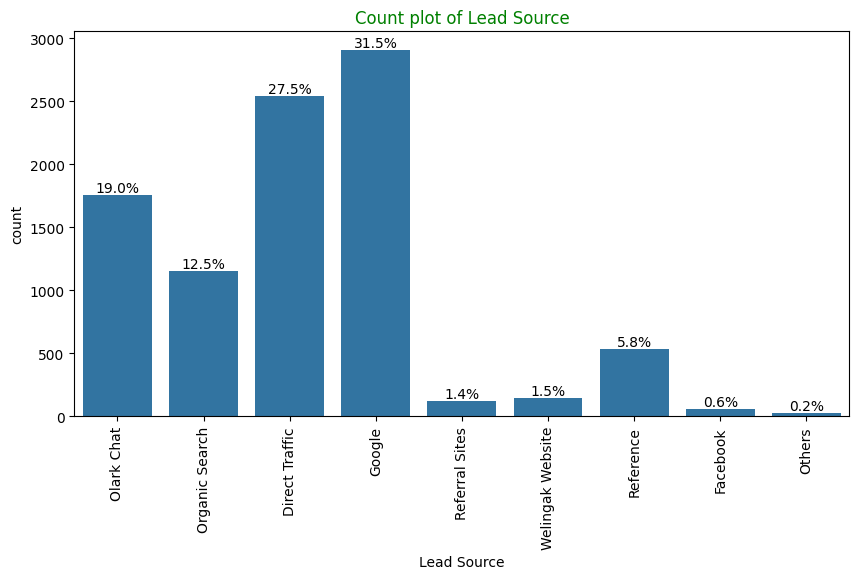

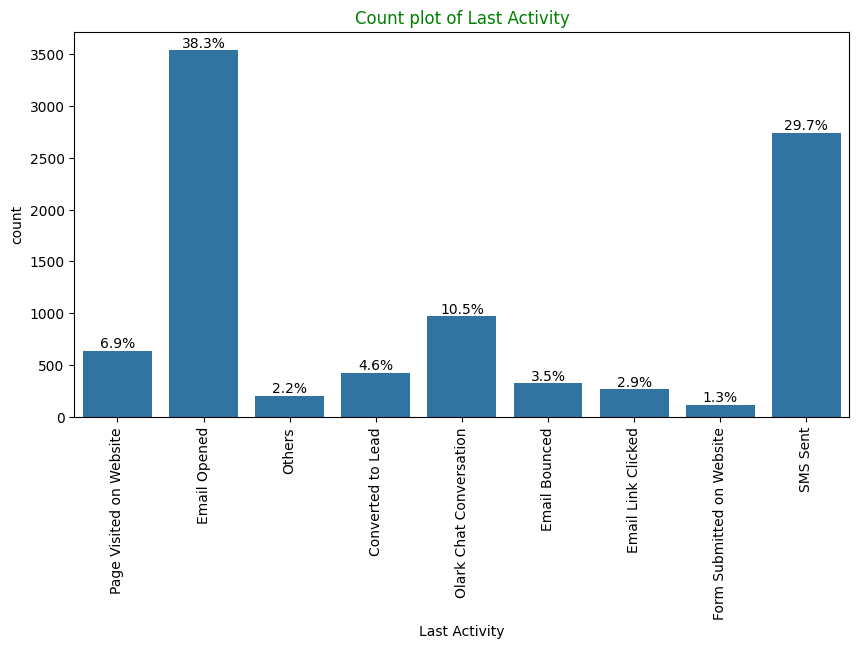

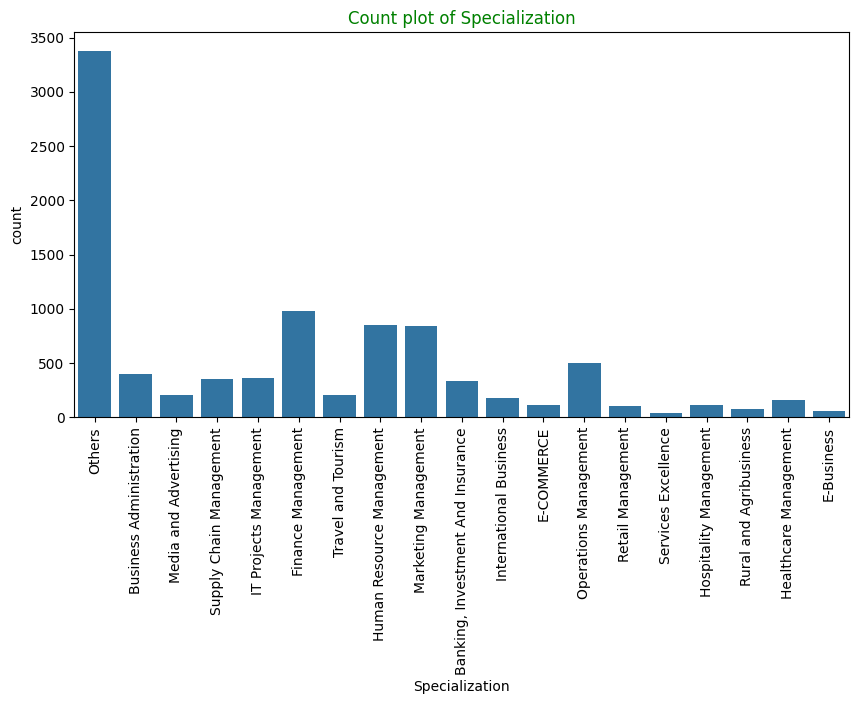

In [200]:
# Barplot for remaining columns from cat_cols (Did separate to rotate xticks 90* so labels doesnt become messy)
for i in cat_cols[4:]:

    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=90)


    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

<strong><span style="color:purple">Observations:</span></strong>

- In Categorical Univariate Analysis we get to know the value counts percentage in each variable that how much is the distribution of values in each column.

- With this we get some understanding that which variables can be used in **Bivariate analysis**.

<hr/>
<strong><span style="color:purple">Insights Univariate:</span></strong>  

**Here is the list of features from variables which are present in majority (Converted and Not Converted included)**

- **Lead Origin:** "Landing Page Submission" identified 53% customers, "API" identified 39%.

- **Current_occupation:** It has 90% of the customers as Unemployed which is highly skewed therefore we drop it.

- **Do Not Email:** 92% of the people has opted that they dont want to be emailed about the course, which is highly skewed therefore we drop it.

- **Lead Source:** 58% Lead source is from Google & Direct Traffic combined

- **Last Activity:** 68% of customers contribution in SMS Sent & Email Opened activities

<strong><span style="color:blue">Inference:</span></strong> These insights will be helpful in further Bivariate Analysis.

#### Bivariate Analysis for Numerical Variables

<Figure size 1600x400 with 0 Axes>

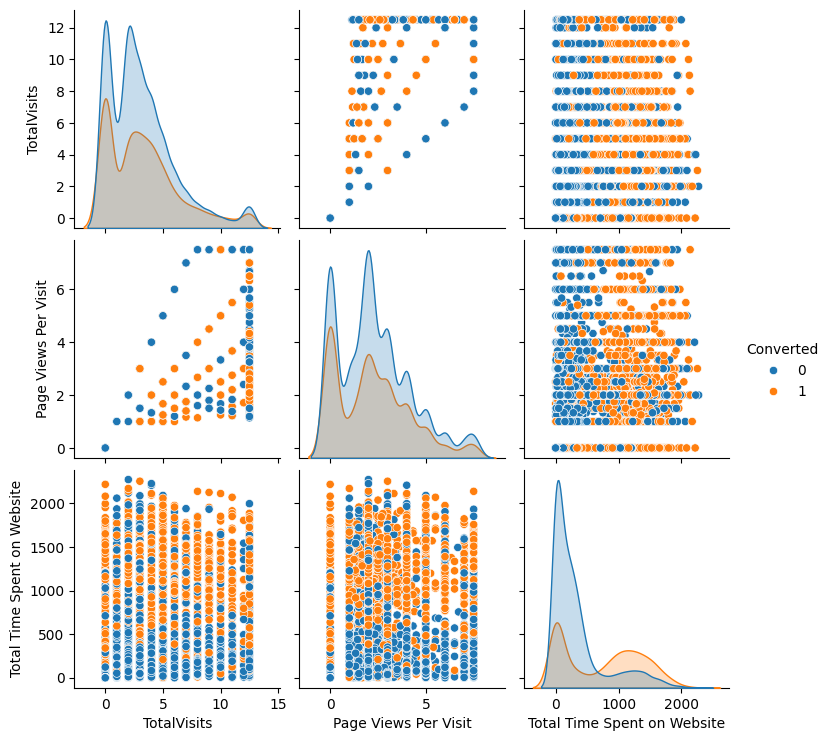

In [201]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=df_leads,vars=num_cols,hue="Converted")
plt.show()

Insight:  
Page views per visit and Total visits have somewhat a linear combination.

In [202]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

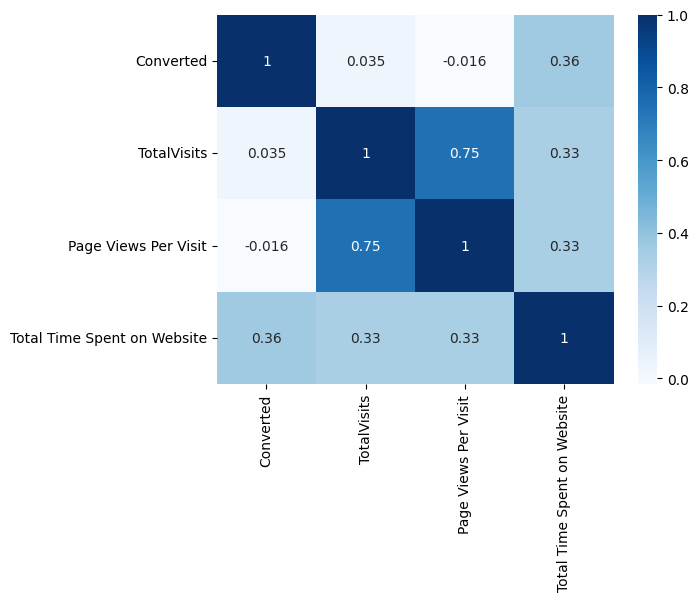

In [203]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=df_leads[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

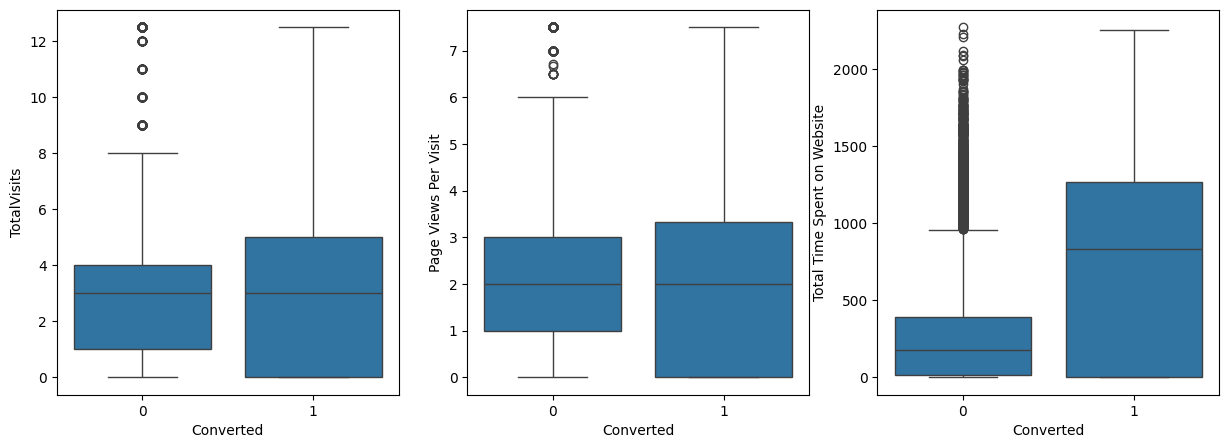

In [204]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

Insights:
- Past Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot
- There are quite a few outliers but we will leave them for now.

## <strong>Step 5: Data Preparation</span></strong>

### Dummy Variables
- For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [205]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  TotalVisits  \
0                      API      Olark Chat             0          0          0.0   
1                      API  Organic Search             0          0          5.0   
2  Landing Page Submission  Direct Traffic             0          1          2.0   
3  Landing Page Submission  Direct Traffic             0          0          1.0   
4  Landing Page Submission          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0                   Others   
4                         1428                   1.0        Converted to Lead   

            Specialization Current_occupation  Free_copy  
0                   Others         Unemployed          0  
1                   Others         Unemployed          0  
2  Business Administration            Student          1  
3    Media and Advertising         Unemployed          0  
4                   Others         Unemployed          0

In [206]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df_leads[["Lead Origin","Lead Source","Last Activity","Specialization",'Current_occupation']], drop_first=True)

# Adding the results to the master dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

In [207]:
df_leads = df_leads.replace({True: 1, False: 0})

In [208]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  TotalVisits  \
0                      API      Olark Chat             0          0          0.0   
1                      API  Organic Search             0          0          5.0   
2  Landing Page Submission  Direct Traffic             0          1          2.0   
3  Landing Page Submission  Direct Traffic             0          0          1.0   
4  Landing Page Submission          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0                   Others   
4                         1428                   1.0        Converted to Lead   

            Specialization Current_occupation  Free_copy  Lead Origin_Landing Page Submission  \
0                   Others         Unemployed          0                                    0   
1                   Others         Unemployed          0                                    0   
2  Business Administration            Student          1                                    1   
3    Media and Advertising         Unemployed          0                                    1   
4                   Others         Unemployed          0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                          0                        0                           0   
1                          0                        0                           0   
2                          0                        0                           0   
3                          0                        0                           0   
4                          0                        0                           0   

   Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                     0                   0                       1                           0   
1                     0                   0                       0                           1   
2                     0                   0                       0                           0   
3                     0                   0                       0                           0   
4                     0                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                             0                            0                                 0   
1                             0                            0                                 0   
2                             0                            0                                 0   
3                             0                            0                                 0   
4                             0                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                     

In [209]:
# We have created dummies for the below variables, so we can drop them

df_leads = df_leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization", 'Current_occupation'],axis=1)

In [210]:
df_leads.shape

(9240, 49)

In [211]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   int64  
 7   Lead Origin_Lead Add Form                 9240 non-null   int64  
 8   Lead Origin_Lead Import                   9240 non-null   int64  
 9   Lead Origin_Quick Add Form                9240 non-null   int64  
 10  Lead Source_Facebook                

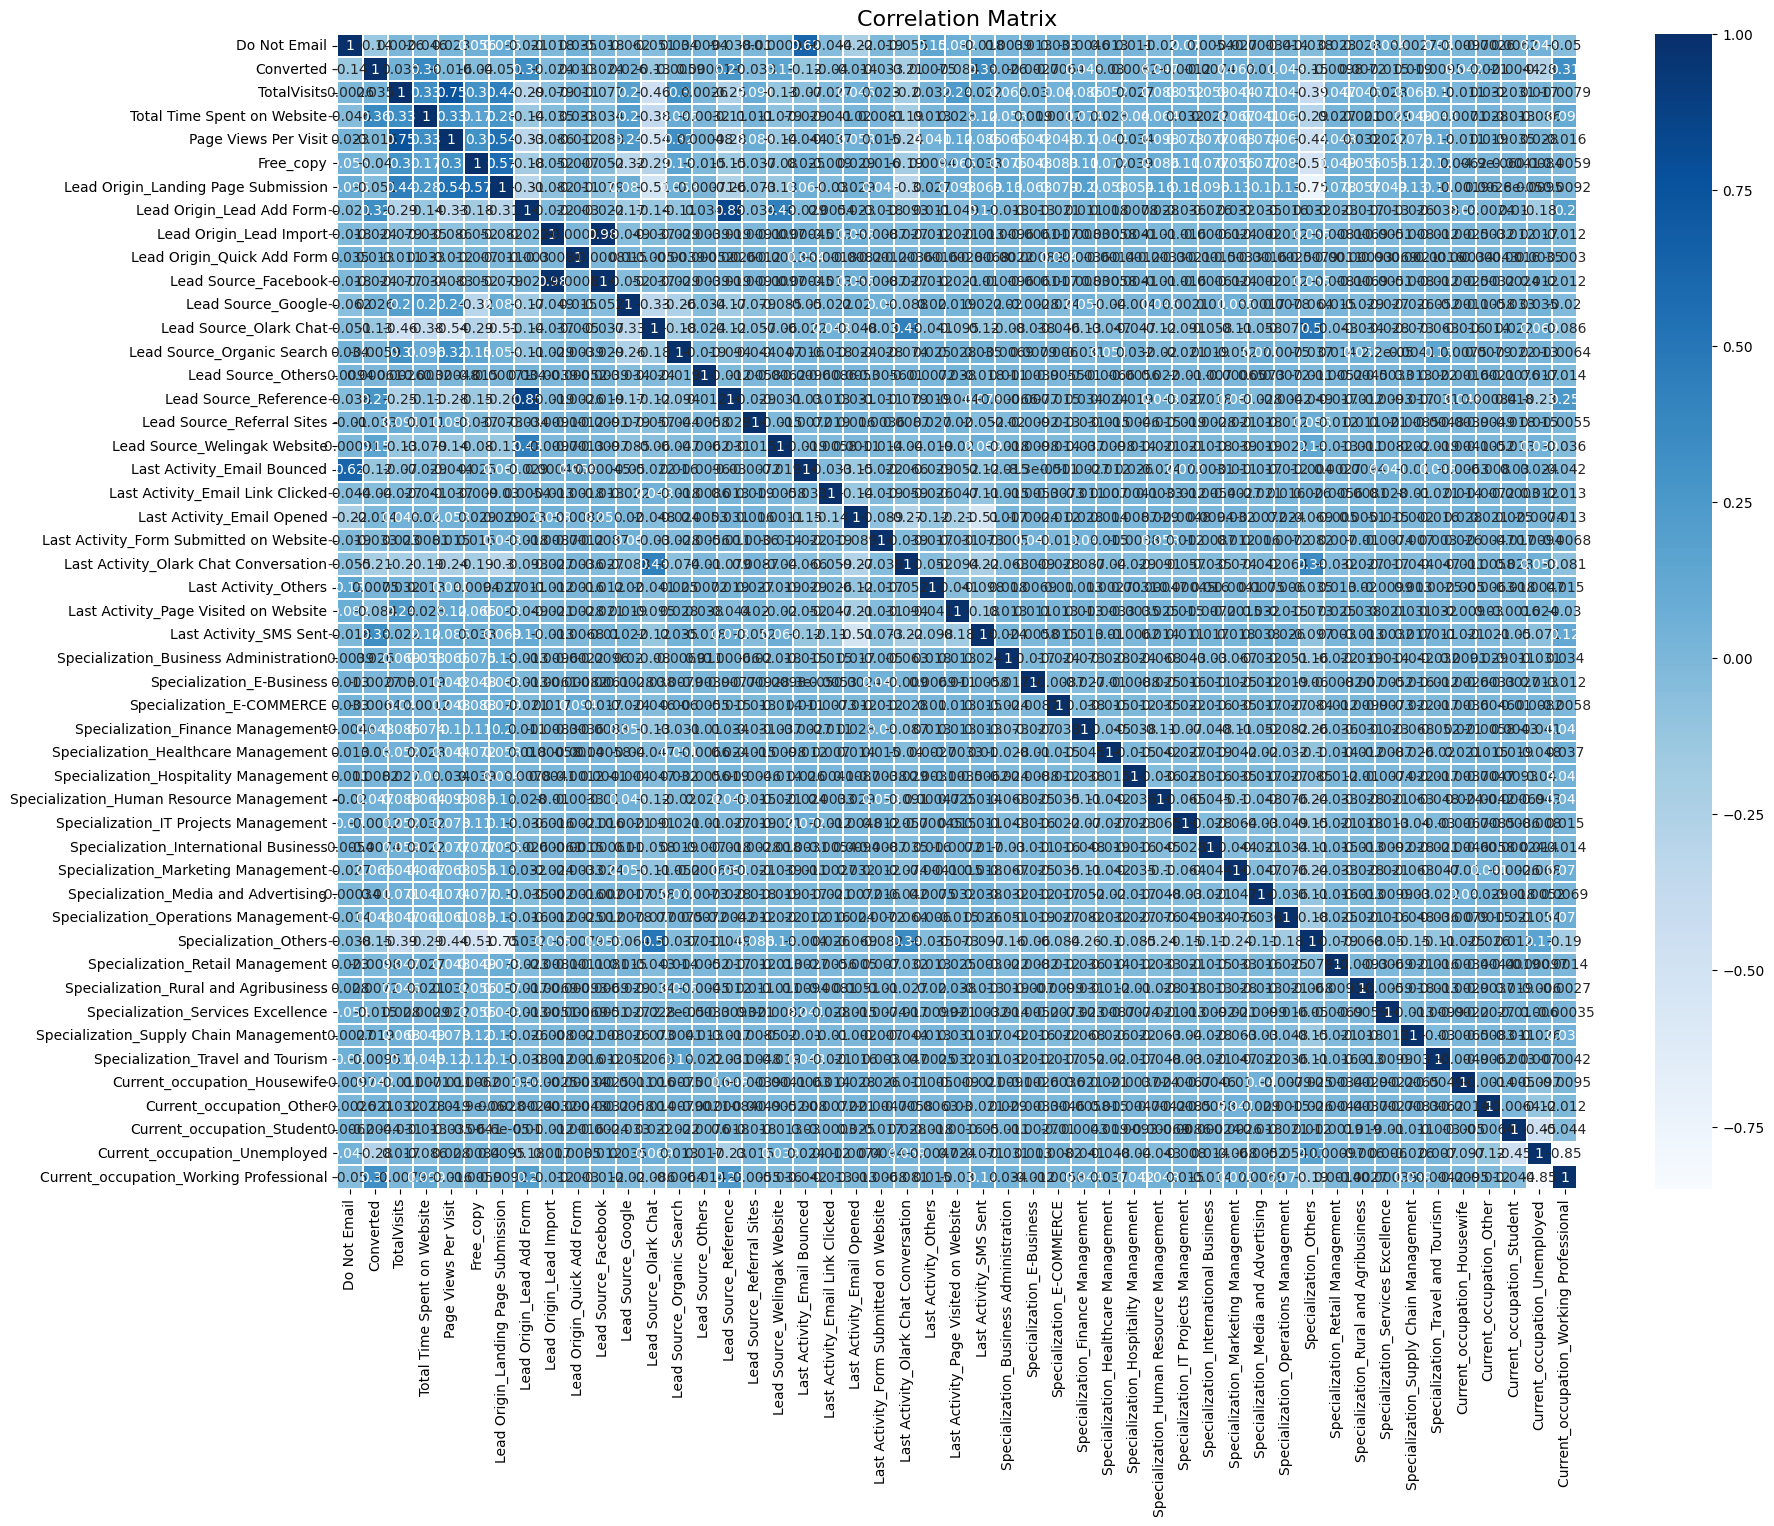

In [212]:
# Filter numeric columns
df_numeric = df_leads.select_dtypes(include=['number'])

# Check for missing values and handle them (e.g., fill with 0 or drop them)
df_numeric = df_numeric.fillna(0)  # You can also use df_numeric.dropna() if appropriate

# Compute and visualize the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(df_numeric.corr(), linewidths=0.01, cmap="Blues", annot=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()


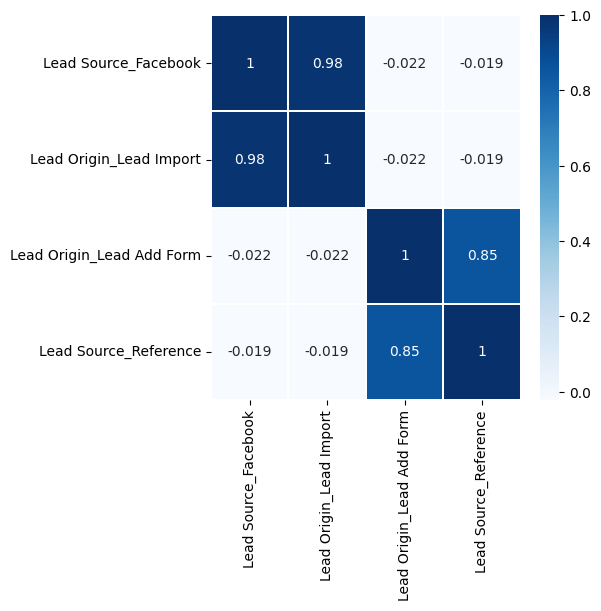

In [213]:
# as the above heatmap has so many columns lets breakdown suspected variables which migh have high correlation with each other
# analysing variables which might be highly correlated with each other from same class from above graph
plt.figure(figsize = (5,5))
sns.heatmap(df_leads[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

Inference: These predictor variables above are very highly correlated with each other near diagonal with (0.98 and 0.85), it is better that we drop one of these variables from each pair as they won’t add much value to the model. So , we can drop any of them, lets drop 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form'.

In [214]:
df_leads = df_leads.drop(['Lead Origin_Lead Import', 'Lead Origin_Lead Add Form'], axis=1)

## <strong>Step 6: Test-Train Split </span></strong>

In [215]:
# Putting predictor variables to X
X = df_leads.drop('Converted', axis=1)

# Putting Target variables to y
y = df_leads["Converted"]


In [216]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [217]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 46) 
y_train: (6468,)


In [218]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 46) 
y_test: (2772,)


## <strong>Step 7: Feature Scaling </span></strong>




In [219]:
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Free_copy  \
1871             0          0.0                            0                  0.00          0   
6795             0          4.0                          487                  1.33          1   
3516             0          5.0                          106                  2.50          0   
8105             0          5.0                         1230                  5.00          0   
3934             0          0.0                            0                  0.00          0   

      Lead Origin_Landing Page Submission  Lead Origin_Quick Add Form  Lead Source_Facebook  \
1871                                    0                           0                     0   
6795                                    1                           0                     0   
3516                                    0                           0                     0   
8105                                    1                           0                     0   
3934                                    0                           0                     0   

      Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
1871                   0                       1                           0                   0   
6795                   0                       0                           0                   0   
3516                   0                       1                           0                   0   
8105                   1                       0                           0                   0   
3934                   0                       1                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  \
1871                      0                           0                             0   
6795                      0                           0                             0   
3516                      0                           0                             0   
8105                      0                           0                             0   
3934                      0                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  \
1871                            0                                 0                           1   
6795                            0                                 0                           1   
3516                            0                                 0                           1   
8105                            0                                 0                           0   
3934                            0                                 0                           1   

      Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  \
1871                                        0                                      0   
6795                                        0                                      0   
3516                                        0                                      0   
8105                                        0                                      0   
3934                                        0                                      0   

      Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
1871                     0                                      0                       0   
6795                     0                                      0                       0   
3516                     0                                      0                       0   
8105                     0                                      0                       1   
3934                     0                                      0                       0   

      Specialization_Business Adm

In [220]:
# using standard scaler for scaling the features
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.describe()

Do Not Email   TotalVisits  Total Time Spent on Website  Page Views Per Visit    Free_copy  \
count   6468.000000  6.468000e+03                 6.468000e+03          6.468000e+03  6468.000000   
mean       0.078386  1.098551e-18                -6.701161e-17          6.508914e-17     0.311843   
std        0.268799  1.000077e+00                 1.000077e+00          1.000077e+00     0.463282   
min        0.000000 -1.064974e+00                -8.853708e-01         -1.184892e+00     0.000000   
25%        0.000000 -1.064974e+00                -8.634138e-01         -1.184892e+00     0.000000   
50%        0.000000 -6.946596e-02                -4.352528e-01         -1.380066e-01     0.000000   
75%        0.000000  5.942058e-01                 8.098906e-01          3.854361e-01     1.000000   
max        1.000000  3.082975e+00                 3.271816e+00          2.740929e+00     1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Quick Add Form  Lead Source_Facebook  \
count                          6468.000000                 6468.000000           6468.000000   
mean                              0.528139                    0.000155              0.005102   
std                               0.499246                    0.012434              0.071252   
min                               0.000000                    0.000000              0.000000   
25%                               0.000000                    0.000000              0.000000   
50%                               1.000000                    0.000000              0.000000   
75%                               1.000000                    0.000000              0.000000   
max                               1.000000                    1.000000              1.000000   

       Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
count         6468.000000             6468.000000                 6468.000000         6468.000000   
mean             0.320810                0.190167                    0.121058            0.002783   
std              0.466824                0.392463                    0.326219            0.052684   
min              0.000000                0.000000                    0.000000            0.000000   
25%              0.000000                0.000000                    0.000000            0.000000   
50%              0.000000                0.000000                    0.000000            0.000000   
75%              1.000000                0.000000                    0.000000            0.000000   
max              1.000000                1.000000                    1.000000            1.000000   

       Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  \
count            6468.000000                 6468.000000                   6468.000000   
mean                0.060297                    0.014224                      0.014069   
std                 0.238054                    0.118422                      0.117786   
min                 0.000000                    0.000000                      0.000000   
25%                 0.000000                    0.000000                      0.000000   
50%                 0.000000                    0.000000                      0.000000   
75%                 0.000000                    0.000000                      0.000000   
max                 1.000000                    1.000000                      1.000000   

       Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  \
count                  6468.000000                       6468.000000                 6468.000000   
mean                      0.036333                          0.028293                    0.381262   
std                       0.187131                          0.165822                    0.485734   
min                       0.000000                          0.000000                    0.000000   
25%        

In [221]:
# X-train dataframe after standard scaling
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Free_copy  \
1871             0    -1.064974                    -0.885371             -1.184892          0   
6795             0     0.262370                     0.005716             -0.488713          1   
3516             0     0.594206                    -0.691418              0.123715          0   
8105             0     0.594206                     1.365219              1.432322          0   
3934             0    -1.064974                    -0.885371             -1.184892          0   

      Lead Origin_Landing Page Submission  Lead Origin_Quick Add Form  Lead Source_Facebook  \
1871                                    0                           0                     0   
6795                                    1                           0                     0   
3516                                    0                           0                     0   
8105                                    1                           0                     0   
3934                                    0                           0                     0   

      Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
1871                   0                       1                           0                   0   
6795                   0                       0                           0                   0   
3516                   0                       1                           0                   0   
8105                   1                       0                           0                   0   
3934                   0                       1                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  \
1871                      0                           0                             0   
6795                      0                           0                             0   
3516                      0                           0                             0   
8105                      0                           0                             0   
3934                      0                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  \
1871                            0                                 0                           1   
6795                            0                                 0                           1   
3516                            0                                 0                           1   
8105                            0                                 0                           0   
3934                            0                                 0                           1   

      Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  \
1871                                        0                                      0   
6795                                        0                                      0   
3516                                        0                                      0   
8105                                        0                                      0   
3934                                        0                                      0   

      Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
1871                     0                                      0                       0   
6795                     0                                      0                       0   
3516                     0                                      0                       0   
8105                     0                                      0                       1   
3934                     0                                      0                       0   

      Specialization_Business Adm

In [222]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
LCR

38.53896103896104

**Inference:**  We have 38.5% Conversion Rate

## <strong>Step 8: Model Building
- We will Build Logistic Regression Model for predicting categorical variable
- Feature Selection Using RFE (Coarse tuning)
- Manual fine-tuning using p-values and VIFs

In [223]:
# building model using all the variables first
# building model using sklearn

# creating an instance of the class Logistic Regression model
lr_model = LogisticRegression(random_state=39)

# fitting the dataset to our logistic regression model
lr_model.fit(X_train, y_train)

# predicting the values
y_pred = lr_model.predict(X_train)

y_pred[:5]

array([0, 0, 0, 1, 0])

In [224]:
# checking the accuracy of our first model on the training set built using sklearn and using all variables
print('Accuracy on Training Set:', metrics.accuracy_score(y_train, y_pred), '\n')
print('Confusion Matrix:','\n', confusion_matrix(y_train, y_pred), '\n')
print('Precision on Training Set:', precision_score(y_train, y_pred), '\n')
print('Recall on Training Set:', recall_score(y_train, y_pred))

Accuracy on Training Set: 0.8102968460111317 

Confusion Matrix: 
 [[3582  420]
 [ 807 1659]] 

Precision on Training Set: 0.797979797979798 

Recall on Training Set: 0.6727493917274939


In [225]:
# predicting on test set
y_test_pred_lr = lr_model.predict(X_test)

# checking the accuracy on testing set
print('Accuracy on testing Set:', metrics.accuracy_score(y_test, y_test_pred_lr), '\n')
print('Confusion Matrix:','\n', confusion_matrix(y_test, y_test_pred_lr), '\n')
print('Precision on testing Set:', precision_score(y_test, y_test_pred_lr), '\n')
print('Recall on testing Set:', recall_score(y_test, y_test_pred_lr))

Accuracy on testing Set: 0.4967532467532468 

Confusion Matrix: 
 [[ 338 1339]
 [  56 1039]] 

Precision on testing Set: 0.43692178301093354 

Recall on testing Set: 0.9488584474885845




### Feature Selection Using RFE (Recursive Feature Elimination)

In [226]:
# let's select 20 features using RFE
rfe = RFE(lr_model, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [227]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Free_copy', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 18),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 13),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 22),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 8),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 9),
 

In [228]:
# Check the top 20 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

features  Feature Chosen  Ranking
0                               Do Not Email            True        1
43                Current_occupation_Student            True        1
42                  Current_occupation_Other            True        1
41              Current_occupation_Housewife            True        1
37     Specialization_Rural and Agribusiness            True        1
35                     Specialization_Others            True        1
28     Specialization_Hospitality Management            True        1
44             Current_occupation_Unemployed            True        1
20                      Last Activity_Others            True        1
19     Last Activity_Olark Chat Conversation            True        1
17                Last Activity_Email Opened            True        1
14              Lead Source_Welingak Website            True        1
22                    Last Activity_SMS Sent            True        1
45   Current_occupation_Working Professional            True        1
5        Lead Origin_Landing Page Submission            True        1
7                       Lead Source_Facebook            True        1
9                     Lead Source_Olark Chat            True        1
12                     Lead Source_Reference            True        1
11                        Lead Source_Others            True        1
2                Total Time Spent on Website            True        1
31     Specialization_International Business           False        2
36          Specialization_Retail Management           False        3
4                                  Free_copy           False        4
1                                TotalVisits           False        5
3                       Page Views Per Visit           False        6
16          Last Activity_Email Link Clicked           False        7
21     Last Activity_Page Visited on Website           False        8
23    Specialization_Business Administration           False        9
34      Specialization_Operations Management           False       10
32       Specialization_Marketing Management           False       11
29  Specialization_Human Resource Management           False       12
15               Last Activity_Email Bounced           False       13
38        Specialization_Services Excellence           False       14
39    Specialization_Supply Chain Management           False       15
8                         Lead Source_Google           False       16
25                 Specialization_E-COMMERCE           False       17
6                 Lead Origin_Quick Add Form           False       18
27      Specialization_Healthcare Management           False       19
30     Specialization_IT Projects Management           False       20
26         Specialization_Finance Management           False       21
18   Last Activity_Form Submitted on Website           False       22
10                Lead Source_Organic Search           False       23
24                 Specialization_E-Business           False       24
33      Specialization_Media and Advertising           False       25
13                Lead Source_Referral Sites           False       26
40         Specialization_Travel and Tourism           False       27

In [229]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Specialization_Rural and Agribusiness', 'Current_occupation_Housewife',
       'Current_occupation_Other', 'Current_occupation_Student', 'Current_occupation_Unemployed',
       'Current_occupation_Working Professional'],
      dtype='object')

In [230]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Free_copy', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website', 'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management', 'Specialization_Human Resource Management',
       'Specialization_IT Projects Management', 'Specialization_International Business',
       'Specialization_Marketing Management', 'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Retail Management',
       'Specialization_Services Excellence', 'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism'],
      dtype='object')

In [231]:
# Selecting top 20 columns
X_train = X_train[rfe_col]

In [232]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model Building

In [233]:
print(X_train.dtypes)
print(X_train.isnull().sum())
print(y_train.dtypes)
print(y_train.isnull().sum())

Do Not Email                                 int64
Total Time Spent on Website                float64
Lead Origin_Landing Page Submission          int64
Lead Source_Facebook                         int64
Lead Source_Olark Chat                       int64
Lead Source_Others                           int64
Lead Source_Reference                        int64
Lead Source_Welingak Website                 int64
Last Activity_Email Opened                   int64
Last Activity_Olark Chat Conversation        int64
Last Activity_Others                         int64
Last Activity_SMS Sent                       int64
Specialization_Hospitality Management        int64
Specialization_Others                        int64
Specialization_Rural and Agribusiness        int64
Current_occupation_Housewife                 int64
Current_occupation_Other                     int64
Current_occupation_Student                   int64
Current_occupation_Unemployed                int64
Current_occupation_Working Prof

MODEL 1:

In [234]:
## adding a constant
X_train_sm = sm.add_constant(X_train)

# building model
lr_m1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# fitting model
res = lr_m1.fit()

# printing summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2705.5
Date:                Mon, 20 Jan 2025   Deviance:                       5411.1
Time:                        14:24:10   Pearson chi2:                 8.17e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3891
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8129      1.220     -0.666      0.505      -3.204       1.579
Do Not Email                               -1.1170      0.170     -6.584      0.000      -1.449      -0.784
Total Time Spent on Website                 1.0457      0.039     26.902      0.000       0.970       1.122
Lead Origin_Landing Page Submission        -1.2396      0.127     -9.778      0.000      -1.488      -0.991
Lead Source_Facebook                       -0.7050      0.527     -1.339      0.181      -1.737       0.327
Lead Source_Olark Chat                      0.9027      0.119      7.578      0.000       0.669       1.136
Lead Source_Others                          1.0918      0.519      2.104      0.035       0.075       2.109
Lead Source_Reference                       2.9153      0.216     13.489      0.000       2.492       3.339
Lead Source_Welingak Website                5.4758      0.732      7.479      0.000       4.041       6.911
Last Activity_Email Opened                  0.7574      0.108      7.011      0.000       0.546       0.969
Last Activity_Olark Chat Conversation      -0.7173      0.189     -3.797      0.000      -1.088      -0.347
Last Activity_Others                        1.4237      0.244      5.836      0.000       0.946       1.902
Last Activity_SMS Sent                      1.9517      0.110     17.780      0.000       1.737       2.167
Specialization_Hospitality Management      -1.0492      0.324     -3.241      0.001      -1.684      -0.415
Specialization_Others                      -1.1760      0.122     -9.664      0.000      -1.415      -0.937
Specialization_Rural and Agribusiness       0.5488      0.389      1.410      0.159      -0.214       1.312
Current_occupation_Housewife               22.9188   1.33e+04      0.002      0.999   -2.61e+04    2.61e+04
Current_occupation_Other                   -0.0022      1.461     -0.001      0.999      -2.866       2.862
Current_occupation_Student                  0.3777      1.241      0.304      0.761      -2.054       2.810
Current_occupation_Unemployed              -0.0672      1.218     -0.055      0.956      -2.455       2.321
Current_occupation_Working Professional     2.5919      1.232      2.104      0.035       0.178       5.006
===========================================================================================================
"""

Lets check the VIF too.

In [235]:
get_vif(X_train_sm)

Features      VIF
0                                     const  1088.05
1             Current_occupation_Unemployed    99.37
2   Current_occupation_Working Professional    78.32
3                Current_occupation_Student    23.26
4       Lead Origin_Landing Page Submission     3.48
5                     Specialization_Others     3.00
6              Current_occupation_Housewife     2.50
7                  Current_occupation_Other     2.33
8                Last Activity_Email Opened     2.07
9                    Last Activity_SMS Sent     1.94
10                   Lead Source_Olark Chat     1.90
11    Last Activity_Olark Chat Conversation     1.72
12                    Lead Source_Reference     1.50
13              Total Time Spent on Website     1.26
14                             Do Not Email     1.15
15                     Last Activity_Others     1.09
16             Lead Source_Welingak Website     1.08
17                     Lead Source_Facebook     1.03
18    Specialization_Hospitality Management     1.01
19    Specialization_Rural and Agribusiness     1.01
20                       Lead Source_Others     1.00

We will drop columns based on following parameters:
If p-value >= 0.05, making the variable statistically insignificant.
If p-value < 0.05, then we will then check for multicollinearity and drop variables if their VIF>3.
Else, we will keep the variables.   
P-value of Current_occupation_Housewife is really high i.e. 0.999, making it completely insignificant.
We will drop this column and rebuild our model.

MODEL 2:

In [236]:
# since Current_occupation_Housewife Add Form has the highest p-value of 0.999, we will drop it first
X_train_sm.drop('Current_occupation_Housewife', axis=1, inplace=True)

In [237]:
# now rebuilding our model
lr_m1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# fitting model
res = lr_m1.fit()

# printing summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2708.8
Date:                Mon, 20 Jan 2025   Deviance:                       5417.7
Time:                        14:24:11   Pearson chi2:                 8.16e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3884
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.2039      0.777      1.550      0.121      -0.319       2.727
Do Not Email                               -1.1148      0.170     -6.573      0.000      -1.447      -0.782
Total Time Spent on Website                 1.0453      0.039     26.897      0.000       0.969       1.121
Lead Origin_Landing Page Submission        -1.2288      0.126     -9.720      0.000      -1.477      -0.981
Lead Source_Facebook                       -0.7027      0.526     -1.335      0.182      -1.734       0.329
Lead Source_Olark Chat                      0.9034      0.119      7.584      0.000       0.670       1.137
Lead Source_Others                          1.0931      0.519      2.107      0.035       0.076       2.110
Lead Source_Reference                       2.9185      0.216     13.508      0.000       2.495       3.342
Lead Source_Welingak Website                5.4768      0.732      7.480      0.000       4.042       6.912
Last Activity_Email Opened                  0.7622      0.108      7.066      0.000       0.551       0.974
Last Activity_Olark Chat Conversation      -0.7238      0.189     -3.827      0.000      -1.094      -0.353
Last Activity_Others                        1.4176      0.245      5.796      0.000       0.938       1.897
Last Activity_SMS Sent                      1.9533      0.110     17.809      0.000       1.738       2.168
Specialization_Hospitality Management      -1.0489      0.324     -3.241      0.001      -1.683      -0.415
Specialization_Others                      -1.1691      0.121     -9.634      0.000      -1.407      -0.931
Specialization_Rural and Agribusiness       0.5477      0.389      1.408      0.159      -0.215       1.310
Current_occupation_Other                   -2.0281      1.115     -1.819      0.069      -4.214       0.158
Current_occupation_Student                 -1.6505      0.804     -2.052      0.040      -3.227      -0.074
Current_occupation_Unemployed              -2.0950      0.770     -2.721      0.007      -3.604      -0.586
Current_occupation_Working Professional     0.5640      0.790      0.714      0.476      -0.985       2.113
===========================================================================================================
"""

In [238]:
get_vif(X_train_sm)

Features     VIF
0                                     const  445.37
1             Current_occupation_Unemployed   39.95
2   Current_occupation_Working Professional   31.90
3                Current_occupation_Student    9.92
4       Lead Origin_Landing Page Submission    3.48
5                     Specialization_Others    3.00
6                Last Activity_Email Opened    2.07
7                    Last Activity_SMS Sent    1.94
8                    Lead Source_Olark Chat    1.90
9     Last Activity_Olark Chat Conversation    1.72
10                 Current_occupation_Other    1.54
11                    Lead Source_Reference    1.50
12              Total Time Spent on Website    1.26
13                             Do Not Email    1.15
14                     Last Activity_Others    1.09
15             Lead Source_Welingak Website    1.08
16                     Lead Source_Facebook    1.03
17    Specialization_Hospitality Management    1.01
18    Specialization_Rural and Agribusiness    1.01
19                       Lead Source_Others    1.00

MODEL 3:

In [239]:
# since Current_occupation_Working Professional has the highest p-value of 0.476, we will drop it first
X_train_sm.drop('Current_occupation_Working Professional', axis=1, inplace=True)

In [240]:
# now rebuilding our model
lr_m1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# fitting model
res = lr_m1.fit()

# printing summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.1
Date:                Mon, 20 Jan 2025   Deviance:                       5418.2
Time:                        14:24:11   Pearson chi2:                 8.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3884
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.7376      0.223      7.801      0.000       1.301       2.174
Do Not Email                             -1.1135      0.170     -6.568      0.000      -1.446      -0.781
Total Time Spent on Website               1.0455      0.039     26.903      0.000       0.969       1.122
Lead Origin_Landing Page Submission      -1.2287      0.126     -9.721      0.000      -1.476      -0.981
Lead Source_Facebook                     -0.7012      0.526     -1.333      0.183      -1.732       0.330
Lead Source_Olark Chat                    0.9037      0.119      7.587      0.000       0.670       1.137
Lead Source_Others                        1.0934      0.519      2.107      0.035       0.076       2.110
Lead Source_Reference                     2.9180      0.216     13.505      0.000       2.495       3.341
Lead Source_Welingak Website              5.4771      0.732      7.481      0.000       4.042       6.912
Last Activity_Email Opened                0.7640      0.108      7.082      0.000       0.553       0.975
Last Activity_Olark Chat Conversation    -0.7242      0.189     -3.827      0.000      -1.095      -0.353
Last Activity_Others                      1.4197      0.245      5.806      0.000       0.940       1.899
Last Activity_SMS Sent                    1.9556      0.110     17.835      0.000       1.741       2.170
Specialization_Hospitality Management    -1.0467      0.323     -3.237      0.001      -1.680      -0.413
Specialization_Others                    -1.1691      0.121     -9.636      0.000      -1.407      -0.931
Specialization_Rural and Agribusiness     0.5487      0.389      1.411      0.158      -0.214       1.311
Current_occupation_Other                 -2.5632      0.828     -3.094      0.002      -4.187      -0.939
Current_occupation_Student               -2.1860      0.298     -7.331      0.000      -2.770      -1.602
Current_occupation_Unemployed            -2.6306      0.185    -14.229      0.000      -2.993      -2.268
=========================================================================================================
"""

In [241]:
get_vif(X_train_sm)

Features    VIF
0                                   const  27.24
1     Lead Origin_Landing Page Submission   3.48
2                   Specialization_Others   3.00
3              Last Activity_Email Opened   2.07
4                  Last Activity_SMS Sent   1.93
5                  Lead Source_Olark Chat   1.90
6   Last Activity_Olark Chat Conversation   1.72
7                   Lead Source_Reference   1.50
8           Current_occupation_Unemployed   1.44
9              Current_occupation_Student   1.29
10            Total Time Spent on Website   1.26
11                           Do Not Email   1.15
12                   Last Activity_Others   1.09
13           Lead Source_Welingak Website   1.08
14                   Lead Source_Facebook   1.03
15               Current_occupation_Other   1.02
16  Specialization_Hospitality Management   1.01
17  Specialization_Rural and Agribusiness   1.01
18                     Lead Source_Others   1.00

MODEL 4:

In [242]:
# since Lead Source_Facebook has the highest p-value of 0.183, we will drop it first
X_train_sm.drop('Lead Source_Facebook', axis=1, inplace=True)

In [243]:
# now rebuilding our model
lr_m1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# fitting model
res = lr_m1.fit()

# printing summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2710.1
Date:                Mon, 20 Jan 2025   Deviance:                       5420.1
Time:                        14:24:11   Pearson chi2:                 8.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3882
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.7208      0.222      7.739      0.000       1.285       2.157
Do Not Email                             -1.1132      0.170     -6.565      0.000      -1.446      -0.781
Total Time Spent on Website               1.0480      0.039     26.989      0.000       0.972       1.124
Lead Origin_Landing Page Submission      -1.2108      0.126     -9.647      0.000      -1.457      -0.965
Lead Source_Olark Chat                    0.9219      0.118      7.782      0.000       0.690       1.154
Lead Source_Others                        1.1011      0.519      2.123      0.034       0.085       2.118
Lead Source_Reference                     2.9381      0.216     13.628      0.000       2.516       3.361
Lead Source_Welingak Website              5.4948      0.732      7.506      0.000       4.060       6.930
Last Activity_Email Opened                0.7583      0.108      7.033      0.000       0.547       0.970
Last Activity_Olark Chat Conversation    -0.7242      0.189     -3.826      0.000      -1.095      -0.353
Last Activity_Others                      1.4200      0.245      5.805      0.000       0.941       1.899
Last Activity_SMS Sent                    1.9520      0.110     17.806      0.000       1.737       2.167
Specialization_Hospitality Management    -1.0580      0.322     -3.281      0.001      -1.690      -0.426
Specialization_Others                    -1.1661      0.121     -9.632      0.000      -1.403      -0.929
Specialization_Rural and Agribusiness     0.5502      0.389      1.414      0.157      -0.212       1.312
Current_occupation_Other                 -2.5589      0.828     -3.090      0.002      -4.182      -0.936
Current_occupation_Student               -2.1875      0.298     -7.343      0.000      -2.771      -1.604
Current_occupation_Unemployed            -2.6289      0.185    -14.224      0.000      -2.991      -2.267
=========================================================================================================
"""

In [244]:
get_vif(X_train_sm)

Features    VIF
0                                   const  27.18
1     Lead Origin_Landing Page Submission   3.45
2                   Specialization_Others   3.00
3              Last Activity_Email Opened   2.06
4                  Last Activity_SMS Sent   1.93
5                  Lead Source_Olark Chat   1.87
6   Last Activity_Olark Chat Conversation   1.72
7                   Lead Source_Reference   1.49
8           Current_occupation_Unemployed   1.44
9              Current_occupation_Student   1.29
10            Total Time Spent on Website   1.26
11                           Do Not Email   1.15
12                   Last Activity_Others   1.09
13           Lead Source_Welingak Website   1.08
14               Current_occupation_Other   1.02
15  Specialization_Hospitality Management   1.01
16  Specialization_Rural and Agribusiness   1.01
17                     Lead Source_Others   1.00

MODEL 6:

In [245]:
# since Last Specialization_Rural and Agribusiness	 Add Form has the highest p-value of 0.157, we will drop it first
X_train_sm.drop('Specialization_Rural and Agribusiness', axis=1, inplace=True)

In [246]:
# now rebuilding our model
lr_m1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# fitting model
res = lr_m1.fit()

# printing summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2711.0
Date:                Mon, 20 Jan 2025   Deviance:                       5422.1
Time:                        14:24:12   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3880
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.7275      0.222      7.773      0.000       1.292       2.163
Do Not Email                             -1.1103      0.169     -6.554      0.000      -1.442      -0.778
Total Time Spent on Website               1.0477      0.039     26.985      0.000       0.972       1.124
Lead Origin_Landing Page Submission      -1.2105      0.125     -9.652      0.000      -1.456      -0.965
Lead Source_Olark Chat                    0.9235      0.118      7.796      0.000       0.691       1.156
Lead Source_Others                        1.0957      0.519      2.113      0.035       0.079       2.112
Lead Source_Reference                     2.9371      0.216     13.626      0.000       2.515       3.360
Lead Source_Welingak Website              5.4947      0.732      7.507      0.000       4.060       6.929
Last Activity_Email Opened                0.7572      0.108      7.027      0.000       0.546       0.968
Last Activity_Olark Chat Conversation    -0.7279      0.189     -3.847      0.000      -1.099      -0.357
Last Activity_Others                      1.4189      0.245      5.796      0.000       0.939       1.899
Last Activity_SMS Sent                    1.9497      0.110     17.800      0.000       1.735       2.164
Specialization_Hospitality Management    -1.0645      0.322     -3.302      0.001      -1.696      -0.433
Specialization_Others                    -1.1730      0.121     -9.702      0.000      -1.410      -0.936
Current_occupation_Other                 -2.5643      0.828     -3.097      0.002      -4.187      -0.941
Current_occupation_Student               -2.1673      0.297     -7.296      0.000      -2.750      -1.585
Current_occupation_Unemployed            -2.6283      0.185    -14.221      0.000      -2.991      -2.266
=========================================================================================================
"""

In [247]:
get_vif(X_train_sm)

Features    VIF
0                                   const  27.16
1     Lead Origin_Landing Page Submission   3.45
2                   Specialization_Others   2.99
3              Last Activity_Email Opened   2.06
4                  Last Activity_SMS Sent   1.93
5                  Lead Source_Olark Chat   1.87
6   Last Activity_Olark Chat Conversation   1.72
7                   Lead Source_Reference   1.49
8           Current_occupation_Unemployed   1.44
9              Current_occupation_Student   1.29
10            Total Time Spent on Website   1.26
11                           Do Not Email   1.15
12                   Last Activity_Others   1.09
13           Lead Source_Welingak Website   1.08
14               Current_occupation_Other   1.02
15  Specialization_Hospitality Management   1.01
16                     Lead Source_Others   1.00

Since 'Lead Origin_Landing Page Submission' has a VIF>3 we will drop it.

MODEL 7:

In [248]:
X_train_sm.drop('Lead Origin_Landing Page Submission', axis=1, inplace=True)

In [249]:
# now rebuilding our model
lr_m1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# fitting model
res = lr_m1.fit()

# printing summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2759.1
Date:                Mon, 20 Jan 2025   Deviance:                       5518.1
Time:                        14:24:12   Pearson chi2:                 7.75e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3789
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.7548      0.193      3.913      0.000       0.377       1.133
Do Not Email                             -1.1544      0.167     -6.921      0.000      -1.481      -0.827
Total Time Spent on Website               1.0613      0.039     27.516      0.000       0.986       1.137
Lead Source_Olark Chat                    1.3105      0.112     11.682      0.000       1.091       1.530
Lead Source_Others                        1.3194      0.516      2.557      0.011       0.308       2.331
Lead Source_Reference                     3.6553      0.203     17.992      0.000       3.257       4.054
Lead Source_Welingak Website              5.7969      0.731      7.933      0.000       4.365       7.229
Last Activity_Email Opened                0.7521      0.107      7.047      0.000       0.543       0.961
Last Activity_Olark Chat Conversation    -0.6877      0.185     -3.714      0.000      -1.051      -0.325
Last Activity_Others                      1.4127      0.244      5.780      0.000       0.934       1.892
Last Activity_SMS Sent                    1.8944      0.108     17.507      0.000       1.682       2.106
Specialization_Hospitality Management    -1.0124      0.315     -3.211      0.001      -1.630      -0.394
Specialization_Others                    -0.3501      0.085     -4.137      0.000      -0.516      -0.184
Current_occupation_Other                 -2.4947      0.806     -3.094      0.002      -4.075      -0.914
Current_occupation_Student               -2.2894      0.289     -7.929      0.000      -2.855      -1.724
Current_occupation_Unemployed            -2.7066      0.182    -14.904      0.000      -3.062      -2.351
=========================================================================================================
"""

In [250]:
get_vif(X_train_sm)

Features    VIF
0                                   const  19.62
1              Last Activity_Email Opened   2.06
2                  Last Activity_SMS Sent   1.93
3   Last Activity_Olark Chat Conversation   1.72
4                  Lead Source_Olark Chat   1.67
5                   Specialization_Others   1.49
6           Current_occupation_Unemployed   1.42
7              Current_occupation_Student   1.27
8             Total Time Spent on Website   1.25
9                            Do Not Email   1.15
10                  Lead Source_Reference   1.14
11                   Last Activity_Others   1.09
12           Lead Source_Welingak Website   1.06
13               Current_occupation_Other   1.02
14  Specialization_Hospitality Management   1.01
15                     Lead Source_Others   1.00

Since all the VIF are less than 3 we will move forward with the model.

# Step 9: Making Predictions

In [251]:
# predicting on training set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.303893
6795    0.175995
3516    0.274261
8105    0.800831
3934    0.235242
4844    0.990304
3297    0.121936
8071    0.996110
987     0.159910
7423    0.843962
dtype: float64

In [252]:
# reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30389318, 0.17599479, 0.27426098, 0.80083056, 0.23524176,
       0.99030352, 0.12193576, 0.99610969, 0.1599101 , 0.84396215])

In [253]:
# building a datarame with actual vs predicted probability
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.303893
1          0         0.175995
2          0         0.274261
3          0         0.800831
4          0         0.235242

In [254]:
# setting cutoff as 0.5 for now
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.apply(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.303893          0
1          0         0.175995          0
2          0         0.274261          0
3          0         0.800831          1
4          0         0.235242          0

# Step 10: Model Evaluation


In [255]:
# checking the accuracy of our prediction on the training set
print('Accuracy on training Set:', metrics.accuracy_score(y_train, y_train_pred_final['Predicted']), '\n')
print('Confusion Matrix:','\n', confusion_matrix(y_train, y_train_pred_final['Predicted']), '\n')
print('Precision on training Set:', precision_score(y_train, y_train_pred_final['Predicted']), '\n')
print('Recall on training Set:', recall_score(y_train, y_train_pred_final['Predicted']))

Accuracy on training Set: 0.8051948051948052 

Confusion Matrix: 
 [[3589  413]
 [ 847 1619]] 

Precision on training Set: 0.796751968503937 

Recall on training Set: 0.6565287915652879


In [256]:
conf_matrix = confusion_matrix(y_train, y_train_pred_final['Predicted'])

# true positive
TP = conf_matrix[1][1]

# true negative
TN = conf_matrix[0][0]

# false positive
FP = conf_matrix[0][1]

# false negative
FN = conf_matrix[1][0]

In [257]:
# accuracy
accuracy = metrics.accuracy_score(y_train, y_train_pred_final['Predicted'])
print('Accuracy:', accuracy)

# sensitivity
sensi = TP / (TP + FN)
print('Sensitivity:', sensi)

# specificity
speci = TN / (TN + FP)
print('Specificity:', speci)

Accuracy: 0.8051948051948052
Sensitivity: 0.6565287915652879
Specificity: 0.8968015992003998


## Finding Otimal Cut-off


0.5 was randomly selected cutoff. Now, let's find out the most optimal cutoff using accuracy, sensitivity and specificity first.

In [258]:
# ROC function
def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs,
                                              drop_intermediate = False)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

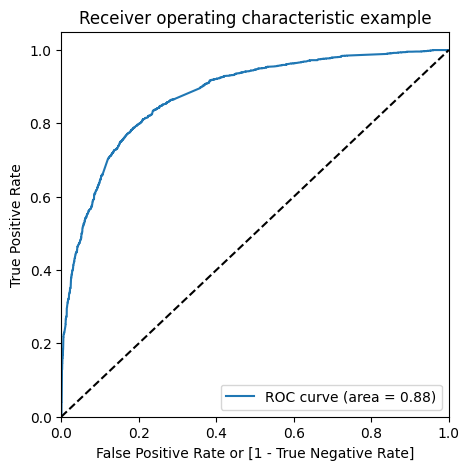

In [259]:
# calling ROC
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under curve (auc) is 0.88 which is a very good value.
It means our model is showing good performance and able to distinguish between positive and negative classes.

In [260]:
# Creating columns with different probability cutoffs
numbers = np.arange(0,1,0.05)
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.apply(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.05  0.1  0.15  0.2  0.25  0.3  0.35  0.4  0.45  \
0          0         0.303893          0    1     1    1     1    1     1    1     0    0     0   
1          0         0.175995          0    1     1    1     1    0     0    0     0    0     0   
2          0         0.274261          0    1     1    1     1    1     1    0     0    0     0   
3          0         0.800831          1    1     1    1     1    1     1    1     1    1     1   
4          0         0.235242          0    1     1    1     1    1     0    0     0    0     0   

   0.5  0.55  0.6  0.65  0.7  0.75  0.8  0.85  0.9  0.95  
0    0     0    0     0    0     0    0     0    0     0  
1    0     0    0     0    0     0    0     0    0     0  
2    0     0    0     0    0     0    0     0    0     0  
3    1     1    1     1    1     1    1     0    0     0  
4    0     0    0     0    0     0    0     0    0     0

In [261]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
num = np.arange(0,1,0.05)
for i in num:
    cm1 = metrics.confusion_matrix(y_train, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = metrics.accuracy_score(y_train, y_train_pred_final[i])

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i, accuracy,sensi,speci]
cutoff_df

prob  accuracy     sensi     speci
0.00  0.00  0.381262  1.000000  0.000000
0.05  0.05  0.448052  0.994728  0.111194
0.10  0.10  0.590600  0.972425  0.355322
0.15  0.15  0.683210  0.941200  0.524238
0.20  0.20  0.728510  0.918491  0.611444
0.25  0.25  0.773036  0.862530  0.717891
0.30  0.30  0.789116  0.836983  0.759620
0.35  0.35  0.800866  0.793998  0.805097
0.40  0.40  0.808287  0.759935  0.838081
0.45  0.45  0.811224  0.726683  0.863318
0.50  0.50  0.805195  0.656529  0.896802
0.55  0.55  0.797928  0.619627  0.907796
0.60  0.60  0.789579  0.577048  0.920540
0.65  0.65  0.786487  0.540957  0.937781
0.70  0.70  0.777056  0.501217  0.947026
0.75  0.75  0.766543  0.453366  0.959520
0.80  0.80  0.753247  0.399432  0.971264
0.85  0.85  0.729592  0.320762  0.981509
0.90  0.90  0.711194  0.260746  0.988756
0.95  0.95  0.683983  0.178021  0.995752

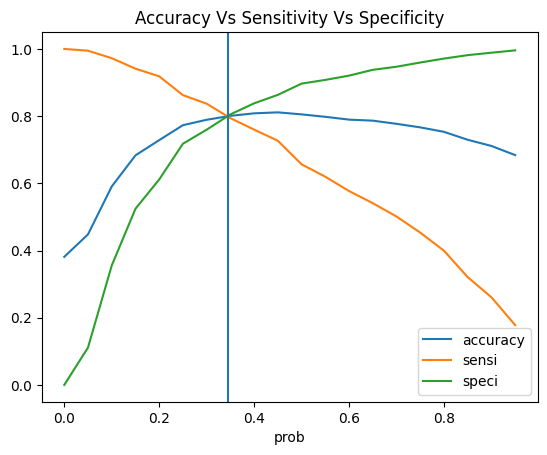

In [262]:
# plotting
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.title('Accuracy Vs Sensitivity Vs Specificity')
plt.axvline(x=0.345)
plt.legend(loc='lower right')
plt.show()

So, our optimal cutoff is 0.345.


In [263]:
# updating prediction on training set based on our optimal cutoff i.e. 0.345
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.apply( lambda x: 1 if x > 0.345 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.05  0.1  0.15  0.2  0.25  0.3  0.35  0.4  0.45  \
0          0         0.303893          0    1     1    1     1    1     1    1     0    0     0   
1          0         0.175995          0    1     1    1     1    0     0    0     0    0     0   
2          0         0.274261          0    1     1    1     1    1     1    0     0    0     0   
3          0         0.800831          1    1     1    1     1    1     1    1     1    1     1   
4          0         0.235242          0    1     1    1     1    1     0    0     0    0     0   

   0.5  0.55  0.6  0.65  0.7  0.75  0.8  0.85  0.9  0.95  final_predicted  
0    0     0    0     0    0     0    0     0    0     0                0  
1    0     0    0     0    0     0    0     0    0     0                0  
2    0     0    0     0    0     0    0     0    0     0                0  
3    1     1    1     1    1     1    1     0    0     0                1  
4    0     0    0     0    0     0    0     0    0     0                0

In [264]:
# creating confusion matrix
conf_final = confusion_matrix(y_train, y_train_pred_final['final_predicted'])
conf_final

array([[3214,  788],
       [ 501, 1965]])

In [265]:
# true positive
TP = conf_final[1,1]
# true negatives
TN = conf_final[0,0]
# false positives
FP = conf_final[0,1]
# false negatives
FN = conf_final[1,0]

In [266]:
print('Evaluation at an optimal cutoff of 0.35 on training set:', '\n')
# now checking the overall accuracy after updating the cutoff to 0.345 from 0.5
print('Overall Accuracy:', metrics.accuracy_score(y_train, y_train_pred_final['final_predicted']))

# sensitivity
print("Sensitivity:", TP/(TP+FN))

# specificity
print("Specificity:", TN/(TN + FP))

# precision
print("Precision:", precision_score(y_train, y_train_pred_final['final_predicted']))

Evaluation at an optimal cutoff of 0.35 on training set: 

Overall Accuracy: 0.8007111935683364
Sensitivity: 0.7968369829683698
Specificity: 0.8030984507746127
Precision: 0.7137667998547039


## Prediction on Test Set


In [267]:
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Free_copy  \
4269             0          8.0                         1011                   7.5          0   
2376             0          0.0                            0                   0.0          0   
7766             0          5.0                           59                   5.0          0   
9199             0          0.0                            0                   0.0          0   
4359             0          0.0                            0                   0.0          0   

      Lead Origin_Landing Page Submission  Lead Origin_Quick Add Form  Lead Source_Facebook  \
4269                                    0                           0                     0   
2376                                    0                           0                     0   
7766                                    0                           0                     0   
9199                                    0                           0                     0   
4359                                    0                           0                     0   

      Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
4269                   0                       0                           0                   0   
2376                   0                       0                           0                   0   
7766                   1                       0                           0                   0   
9199                   0                       1                           0                   0   
4359                   0                       0                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  \
4269                      0                           0                             0   
2376                      1                           0                             0   
7766                      0                           0                             0   
9199                      0                           0                             0   
4359                      1                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  \
4269                            0                                 0                           0   
2376                            0                                 0                           0   
7766                            0                                 0                           0   
9199                            0                                 0                           0   
4359                            0                                 0                           1   

      Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  \
4269                                        0                                      0   
2376                                        0                                      0   
7766                                        0                                      0   
9199                                        0                                      1   
4359                                        0                                      0   

      Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
4269                     0                                      0                       1   
2376                     0                                      0                       1   
7766                     1                                      0                       0   
9199                     0                                      0                       0   
4359                     0                                      0                       0   

      Specialization_Business Adm

In [268]:
X_test.dtypes

Do Not Email                                  int64
TotalVisits                                 float64
Total Time Spent on Website                   int64
Page Views Per Visit                        float64
Free_copy                                     int64
Lead Origin_Landing Page Submission           int64
Lead Origin_Quick Add Form                    int64
Lead Source_Facebook                          int64
Lead Source_Google                            int64
Lead Source_Olark Chat                        int64
Lead Source_Organic Search                    int64
Lead Source_Others                            int64
Lead Source_Reference                         int64
Lead Source_Referral Sites                    int64
Lead Source_Welingak Website                  int64
Last Activity_Email Bounced                   int64
Last Activity_Email Link Clicked              int64
Last Activity_Email Opened                    int64
Last Activity_Form Submitted on Website       int64
Last Activity_Olark Chat Conversation         int64
Last Activity_Others                          int64
Last Activity_Page Visited on Website         int64
Last Activity_SMS Sent                        int64
Specialization_Business Administration        int64
Specialization_E-Business                     int64
Specialization_E-COMMERCE                     int64
Specialization_Finance Management             int64
Specialization_Healthcare Management          int64
Specialization_Hospitality Management         int64
Specialization_Human Resource Management      int64
Specialization_IT Projects Management         int64
Specialization_International Business         int64
Specialization_Marketing Management           int64
Specialization_Media and Advertising          int64
Specialization_Operations Management          int64
Specialization_Others                         int64
Specialization_Retail Management              int64
Specialization_Rural and Agribusiness         int64
Specialization_Services Excellence            int64
Specialization_Supply Chain Management        int64
Specialization_Travel and Tourism             int64
Current_occupation_Housewife                  int64
Current_occupation_Other                      int64
Current_occupation_Student                    int64
Current_occupation_Unemployed                 int64
Current_occupation_Working Professional       int64
dtype: object

In [269]:
# fetching int64 and float64 dtype columns from dataframe for scaling
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_test.describe()


Do Not Email  TotalVisits  Total Time Spent on Website  Page Views Per Visit    Free_copy  \
count   2772.000000  2772.000000                  2772.000000           2772.000000  2772.000000   
mean       0.081890     0.004994                     0.023314              0.019778     0.314214   
std        0.274247     0.990665                     1.008922              1.012632     0.464286   
min        0.000000    -1.064974                    -0.885371             -1.184892     0.000000   
25%        0.000000    -1.064974                    -0.861584             -1.184892     0.000000   
50%        0.000000    -0.069466                    -0.413296             -0.138007     0.000000   
75%        0.000000     0.594206                     0.851060              0.647158     1.000000   
max        1.000000     3.082975                     3.237051              2.740929     1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Quick Add Form  Lead Source_Facebook  \
count                          2772.000000                      2772.0           2772.000000   
mean                              0.530303                         0.0              0.007937   
std                               0.499171                         0.0              0.088749   
min                               0.000000                         0.0              0.000000   
25%                               0.000000                         0.0              0.000000   
50%                               1.000000                         0.0              0.000000   
75%                               1.000000                         0.0              0.000000   
max                               1.000000                         0.0              1.000000   

       Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
count         2772.000000             2772.000000                 2772.000000         2772.000000   
mean             0.300866                0.189394                    0.133838            0.001804   
std              0.458717                0.391892                    0.340540            0.042440   
min              0.000000                0.000000                    0.000000            0.000000   
25%              0.000000                0.000000                    0.000000            0.000000   
50%              0.000000                0.000000                    0.000000            0.000000   
75%              1.000000                0.000000                    0.000000            0.000000   
max              1.000000                1.000000                    1.000000            1.000000   

       Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  \
count            2772.000000                 2772.000000                   2772.000000   
mean                0.051948                    0.011905                      0.018398   
std                 0.221962                    0.108477                      0.134411   
min                 0.000000                    0.000000                      0.000000   
25%                 0.000000                    0.000000                      0.000000   
50%                 0.000000                    0.000000                      0.000000   
75%                 0.000000                    0.000000                      0.000000   
max                 1.000000                    1.000000                      1.000000   

       Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  \
count                  2772.000000                       2772.000000                 2772.000000   
mean                      0.032828                          0.030303                    0.387446   
std                       0.178219                          0.171451                    0.487255   
min                       0.000000                          0.000000                    0.000000   
25%                 

In [270]:
# including only those columns which were used to build final model
cols = [col for col in X_train_sm.columns if col != 'const']
X_test = X_test[cols]

# adding constant to test set
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

const  Do Not Email  Total Time Spent on Website  Lead Source_Olark Chat  \
4269    1.0             0                     0.964504                       0   
2376    1.0             0                    -0.885371                       0   
7766    1.0             0                    -0.777416                       0   
9199    1.0             0                    -0.885371                       1   
4359    1.0             0                    -0.885371                       0   

      Lead Source_Others  Lead Source_Reference  Lead Source_Welingak Website  \
4269                   0                      0                             0   
2376                   0                      1                             0   
7766                   0                      0                             0   
9199                   0                      0                             0   
4359                   0                      1                             0   

      Last Activity_Email Opened  Last Activity_Olark Chat Conversation  Last Activity_Others  \
4269                           0                                      0                     0   
2376                           0                                      0                     0   
7766                           0                                      0                     1   
9199                           0                                      1                     0   
4359                           1                                      0                     0   

      Last Activity_SMS Sent  Specialization_Hospitality Management  Specialization_Others  \
4269                       1                                      0                      1   
2376                       1                                      0                      1   
7766                       0                                      0                      0   
9199                       0                                      0                      1   
4359                       0                                      0                      0   

      Current_occupation_Other  Current_occupation_Student  Current_occupation_Unemployed  
4269                         0                           0                              1  
2376                         0                           0                              1  
7766                         0                           0                              0  
9199                         0                           0                              1  
4359                         0                           0                              1

In [271]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          1         0.649333
1          1         0.909556
2          1         0.792892
3          0         0.067939
4          1         0.819955

In [272]:
# Making prediction using our optimal cutoff i.e. 0.345
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.apply(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.649333                1
1          1         0.909556                1
2          1         0.792892                1
3          0         0.067939                0
4          1         0.819955                1

In [273]:
# creating confusion matrix
conf_final2 = confusion_matrix(y_test, y_pred_final['final_predicted'])
conf_final2

array([[1353,  324],
       [ 229,  866]])

In [274]:
# true positive
TP = conf_final2[1,1]
# true negatives
TN = conf_final2[0,0]
# false positives
FP = conf_final2[0,1]
# false negatives
FN = conf_final2[1,0]

In [275]:
print('Evaluation of our final model at our final cutoff of 0.35 on test set:', '\n')
# checking overall accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_final['final_predicted']))

# sensitivity
print("Sensitivity/Recall:", TP/(TP+FN))

# specificity
print("Specificity:", TN/(TN + FP))

# precision
print('Precision: ', precision_score(y_test, y_pred_final['final_predicted']))

Evaluation of our final model at our final cutoff of 0.35 on test set: 

Accuracy: 0.8005050505050505
Sensitivity/Recall: 0.7908675799086758
Specificity: 0.8067978533094812
Precision:  0.7277310924369748


## Assigning Scores

In [276]:
# dropping all the cutoffs columns as they are not required anymore
cols_to_drop = y_train_pred_final.iloc[:,2:23].columns
y_train_pred_final.drop(columns=cols_to_drop, inplace=True)
y_train_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          0         0.303893                0
1          0         0.175995                0
2          0         0.274261                0
3          0         0.800831                1
4          0         0.235242                0

In [277]:
y_pred_final.head()


Converted  Conversion_Prob  final_predicted
0          1         0.649333                1
1          1         0.909556                1
2          1         0.792892                1
3          0         0.067939                0
4          1         0.819955                1

In [278]:
# renaming converted to Converted
y_pred_final.rename({'converted':'Converted'}, axis=1, inplace=True)
y_pred_final.head(1)

Converted  Conversion_Prob  final_predicted
0          1         0.649333                1

In [279]:
# now let's merge these two dataframes
final_df = pd.concat([y_train_pred_final, y_pred_final], axis=0)
final_df.head()

Converted  Conversion_Prob  final_predicted
0          0         0.303893                0
1          0         0.175995                0
2          0         0.274261                0
3          0         0.800831                1
4          0         0.235242                0

In [280]:
# let's confirm the shape
final_df.shape

(9240, 3)

In [281]:
# creating a columns scores to assign score to each lead
final_df['Scores'] = round(final_df['Conversion_Prob']*100)
final_df.head()

Converted  Conversion_Prob  final_predicted  Scores
0          0         0.303893                0    30.0
1          0         0.175995                0    18.0
2          0         0.274261                0    27.0
3          0         0.800831                1    80.0
4          0         0.235242                0    24.0

In [282]:
# calculating conversion rate based on different scores
rate = final_df[final_df.Scores >= 28].final_predicted.sum() / final_df[final_df.Scores >= 28].final_predicted.shape[0]
print("Conversion Rate at score >= 28:", round(rate*100, 2))

Conversion Rate at score >= 28: 87.41


In [283]:
rate = final_df[final_df.Scores >= 30].final_predicted.sum() / final_df[final_df.Scores >= 30].final_predicted.shape[0]
print("Conversion Rate at score >= 30:", round(rate*100, 2))

Conversion Rate at score >= 30: 90.25


In [284]:
rate = final_df[final_df.Scores >= 36].final_predicted.sum() / final_df[final_df.Scores >= 36].final_predicted.shape[0]
print("Conversion Rate at score >= 36", round(rate*100, 2))

Conversion Rate at score >= 36 100.0


## Summary

The variables that can be considered are :  
Do Not Email

Total Time Spent on Website

Lead Source_Olark Chat

Lead Source_Others

Lead Source_Reference

Lead Source_Welingak Website

Last Activity_Email Opened

Last Activity_Olark Chat Conversation

Last Activity_Others

Last Activity_SMS Sent

Specialization_Hospitality Management

Specialization_Others

Current_occupation_Other

Current_occupation_Student

Current_occupation_Unemployed

Leads with score of more than 28 can be targeted by the X Education. Anyone having a score of >= 28 can be considered a Hot Lead.

Evaluation of our final model at our final cutoff of 0.35 on test set:  
Accuracy: 80.05%   
Sensitivity/Recall: 79.73% = 80%  
Specificity: 81%  
Precision:  73.3%

Question 1 :	Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?  
Answer : The top 3 variable are -    
Total Time Spent on Website   
Lead Source_Reference   
Lead Source_Welingak Website


Question 2 : What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?   
Answer: The top 3 categorical variables are:  
Lead Source_Reference   
Lead Source_Welingak Website  
Current_occupation_Student

Question 3 : X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.   
Answer: The following strategies can be adopted:
*   They can lower the probability cut-off so that more leads can be classified as hot leads.
*   They should contact the leads whos source is Welingak website or reference, has last activity as SMS Sent or as they have a highe chances of conversion.
*   Apart from that they can also look for people who spend a lot of time on their website as they can be potential hot leads.



Question 4: Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.    
Answer: The following stategies can be adopted:
*   The probability cutoff can be raised so that only those leads are contacted those have very high chance of conversion.
*   A personalised SMS or email should be sent to the leads and only the ones responding positevely should be contacted.
*   The only priority should be given to customers who spent a considerable amount of time on website because they have a very high chances of getting converted.

